## 📌 Import Libraries and Load Dataset

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('train.csv')

# Show first few rows
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


📘 Result & Summary:
In this initial step, I imported the pandas library and loaded the dataset train.csv into a DataFrame named df.
Using df.head(), I previewed the first few rows of the dataset. The dataset includes the following columns:

Store: Store ID

Dept: Department number

Date: Weekly sales date

Weekly_Sales: Total weekly sales

IsHoliday: Indicates if the week is a holiday

## Step 1: Dataset Overview

To begin, I examined the dataset structure using the `info()` method in pandas.  
This command provides details such as the number of rows and columns, column names, data types, and the presence of missing values.  
It helps understand the size and composition of the dataset before proceeding with any cleaning or analysis.

In [5]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


📘 Result & Summary:
This command helps understand the size and structure of the dataset:

Total 421,570 records across 5 columns

No missing values in any column

Column types: int64, float64, bool, and object

In [6]:
# Show summary statistics for numerical columns
# Useful to understand distributions, central tendency, and detect outliers
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


📘 Result & Summary:
This output provides descriptive statistics:

Weekly_Sales ranges from -4988.94 to 693,099.36

The mean weekly sales is about 15,981

The presence of negative sales values suggests potential anomalies or returned items

## Step 2: Data Cleaning

Before performing any analysis or modeling, I check for missing or anomalous values in the dataset.
This includes identifying null values, duplicated rows, and invalid numerical entries such as negative sales.

In [7]:
# Check for missing values
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
# Check for duplicated rows
df.duplicated().sum()

0

In [9]:
# Check for negative sales values (anomalous entries)
df[df['Weekly_Sales'] < 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


📘 Result & Summary:
✅ No missing values in the dataset

✅ No duplicate rows found

⚠️ Found 1,285 rows with negative Weekly_Sales
These may represent data entry errors or returns and need further handling.

## Step 3: Data Cleaning

Before conducting any exploratory analysis or modeling, it's essential to check the dataset for potential issues.
In this step, I will:

- Check for missing values,
- Identify duplicate rows,
- Detect invalid values such as negative sales.

These checks help ensure the quality and reliability of the data before moving forward.

In [10]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicated rows
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())

# Check for negative sales values (which are likely data entry errors)
print("\nRows with negative weekly sales:")
print(df[df['Weekly_Sales'] < 0])

Missing values per column:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Number of duplicated rows:
0

Rows with negative weekly sales:
        Store  Dept        Date  Weekly_Sales  IsHoliday
846         1     6  2012-08-10       -139.65      False
2384        1    18  2012-05-04         -1.27      False
6048        1    47  2010-02-19       -863.00      False
6049        1    47  2010-03-12       -698.00      False
6051        1    47  2010-10-08        -58.00      False
...       ...   ...         ...           ...        ...
419597     45    80  2010-02-12         -0.43       True
419598     45    80  2010-02-19         -0.27      False
419603     45    80  2010-04-16         -1.61      False
419614     45    80  2010-07-02         -0.27      False
419640     45    80  2011-02-11         -0.24       True

[1285 rows x 5 columns]


### Step 3 Conclusion:

- ✅ No missing values were found in any of the columns.
- ✅ There are no duplicated rows in the dataset.
- ⚠️ Some rows contain negative `Weekly_Sales` values, which are likely data entry errors.

Next, we will decide how to handle these invalid negative sales entries—either by removing or imputing them.

## Step 4: Handling Invalid Values

In the previous step, we identified rows with negative `Weekly_Sales`, which are not logically valid.
In this step, we will remove these rows from the dataset to improve the accuracy of our analysis and modeling.

In [11]:
# Remove rows where Weekly_Sales is negative
df = df[df['Weekly_Sales'] >= 0].copy()

# Confirm removal
print("Remaining rows after removing invalid sales:", len(df))
print("Any negative Weekly_Sales left:", (df['Weekly_Sales'] < 0).sum())

Remaining rows after removing invalid sales: 420285
Any negative Weekly_Sales left: 0


### Step 4 Conclusion:

- ⚠️ All rows with negative `Weekly_Sales` have been successfully removed.
- ✅ The dataset now contains only valid weekly sales figures.
- 🧹 This cleaning step ensures that further analysis and models are not skewed by invalid values.

## Step 5: Feature Engineering

To enhance the dataset and prepare it for modeling, we will create new features based on existing data.
This includes extracting time-related components from the `Date` column, such as `Year`, `Month`, and `Week`.
These new features can help capture seasonal trends and patterns in sales behavior.

In [12]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract new time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day'] = df['Date'].dt.day

# Display sample data with new features
df[['Date', 'Year', 'Month', 'Week', 'Day']].head()

,Date,Year,Month,Week,Day
0,2010-02-05,2010,2,5,5
1,2010-02-12,2010,2,6,12
2,2010-02-19,2010,2,7,19
3,2010-02-26,2010,2,8,26
4,2010-03-05,2010,3,9,5


### Step 5 Conclusion:

- 📅 Extracted additional time-based features: `Year`, `Month`, `Week`, and `Day` from the `Date` column.
- 🧠 These features are useful for capturing seasonality, holidays, and trends over time.
- ✅ The dataset is now more informative and ready for further feature engineering or modeling.

## Step 6: Advanced Feature Engineering

To better capture temporal patterns and short-term sales trends, we introduce new statistical features:
- **Moving Averages (rolling mean)** over a window of 4 and 12 weeks.
- **Binary Encoding** of the `IsHoliday` column (already boolean, but for clarity and modeling purposes we'll convert it to 0/1).

These features can help smooth out short-term fluctuations and better capture seasonality or holiday effects.

In [13]:
# Sort values to ensure correct rolling calculation
df = df.sort_values(by=['Store', 'Dept', 'Date'])

# Create 4-week and 12-week rolling average of Weekly Sales per Store-Dept
df['MA_4weeks'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())
df['MA_12weeks'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Encode IsHoliday from boolean to integer
df['IsHoliday'] = df['IsHoliday'].astype(int)

# Display sample of new columns
df[['Date', 'Store', 'Dept', 'Weekly_Sales', 'MA_4weeks', 'MA_12weeks', 'IsHoliday']].head(10)

,Date,Store,Dept,Weekly_Sales,MA_4weeks,MA_12weeks,IsHoliday
0,2010-02-05,1,1,24924.50,24924.500000,24924.500000,0
1,2010-02-12,1,1,46039.49,35481.995000,35481.995000,1
2,2010-02-19,1,1,41595.55,37519.846667,37519.846667,0
3,2010-02-26,1,1,19403.54,32990.770000,32990.770000,0
4,2010-03-05,1,1,21827.90,32216.620000,30758.196000,0
5,2010-03-12,1,1,21043.39,25967.595000,29139.061667,0
6,2010-03-19,1,1,22136.64,21102.867500,28138.715714,0
7,2010-03-26,1,1,26229.21,22809.285000,27900.027500,0
8,2010-04-02,1,1,57258.43,31666.917500,31162.072222,0
9,2010-04-09,1,1,42960.91,37146.297500,32341.956000,0


### Step 6 Conclusion:

- ✅ Successfully created 4-week and 12-week moving average sales features grouped by Store and Department.
- ✅ Converted the `IsHoliday` column into binary integer format (0 = regular week, 1 = holiday week).
- 📈 These engineered features will be helpful for identifying trends and for use in predictive modeling.

## Step 7: Exploratory Data Analysis (EDA)

In this step, I explore the sales data visually to understand trends and patterns across time, stores, and departments.
EDA helps uncover seasonality, outliers, and the influence of holidays.

We start by analyzing overall weekly sales trends and comparing sales across years and holidays.

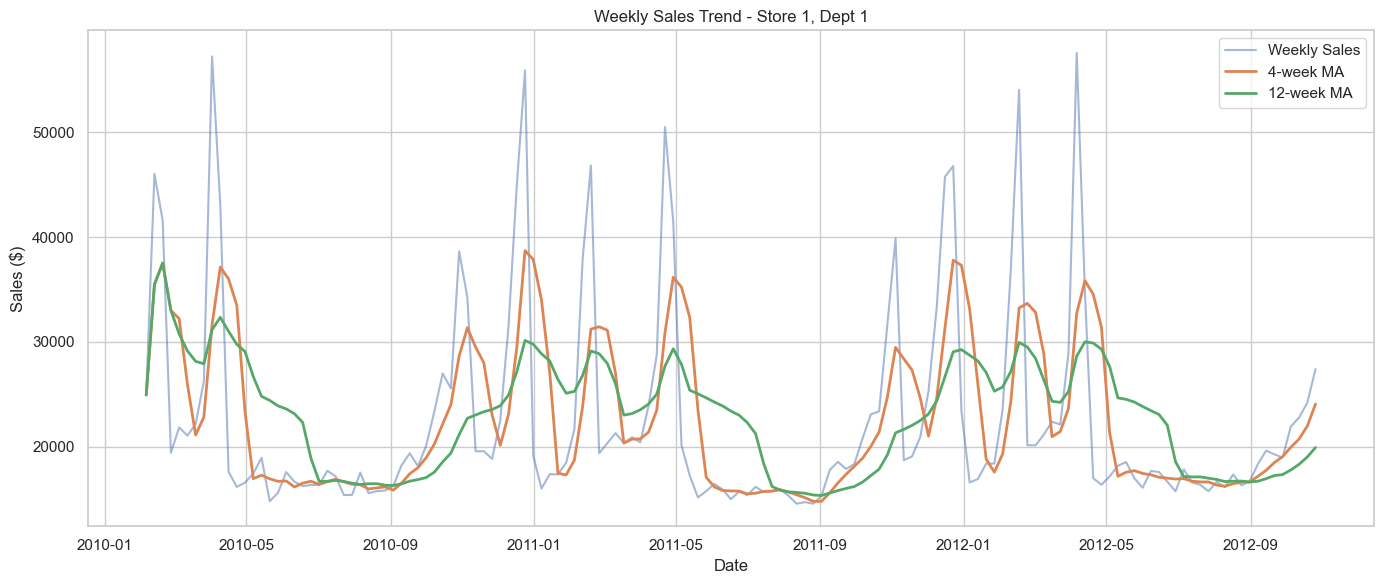

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# Focus on a single store and department for clarity
sample_df = df[(df['Store'] == 1) & (df['Dept'] == 1)].copy()

# Plot sales and moving averages over time
plt.figure(figsize=(14,6))
plt.plot(sample_df['Date'], sample_df['Weekly_Sales'], label='Weekly Sales', alpha=0.5)
plt.plot(sample_df['Date'], sample_df['MA_4weeks'], label='4-week MA', linewidth=2)
plt.plot(sample_df['Date'], sample_df['MA_12weeks'], label='12-week MA', linewidth=2)
plt.title('Weekly Sales Trend - Store 1, Dept 1')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.tight_layout()
plt.show()

### Step 7 Conclusion:

- 📉 The sales trend for Store 1, Department 1 shows strong fluctuations week-to-week.
- 📈 The moving averages (4-week and 12-week) help smooth the data and reveal the underlying trend more clearly.
- 📅 Several sales spikes align with known holiday weeks, indicating the importance of `IsHoliday` as a predictive feature.

Next, we will expand our EDA to analyze seasonal trends across months and evaluate store-level sales distribution.

## 📌 Step 8: Visualizing Weekly Sales and Moving Averages

Before modeling, it's useful to visualize the sales trends to understand seasonality, trends, and noise.  
Here, I focused on **Store 1** and **Department 1** for clarity.


In [15]:
# Focus on a single store and department
sample_df = df[(df['Store'] == 1) & (df['Dept'] == 1)].copy()

🛠️ Create Moving Averages

In [16]:
sample_df['MA_4weeks'] = sample_df['Weekly_Sales'].rolling(window=4).mean()
sample_df['MA_12weeks'] = sample_df['Weekly_Sales'].rolling(window=12).mean()

These moving averages help smooth out short-term fluctuations and highlight long-term trendس.

📊 Plot Sales Trends with Moving Averages

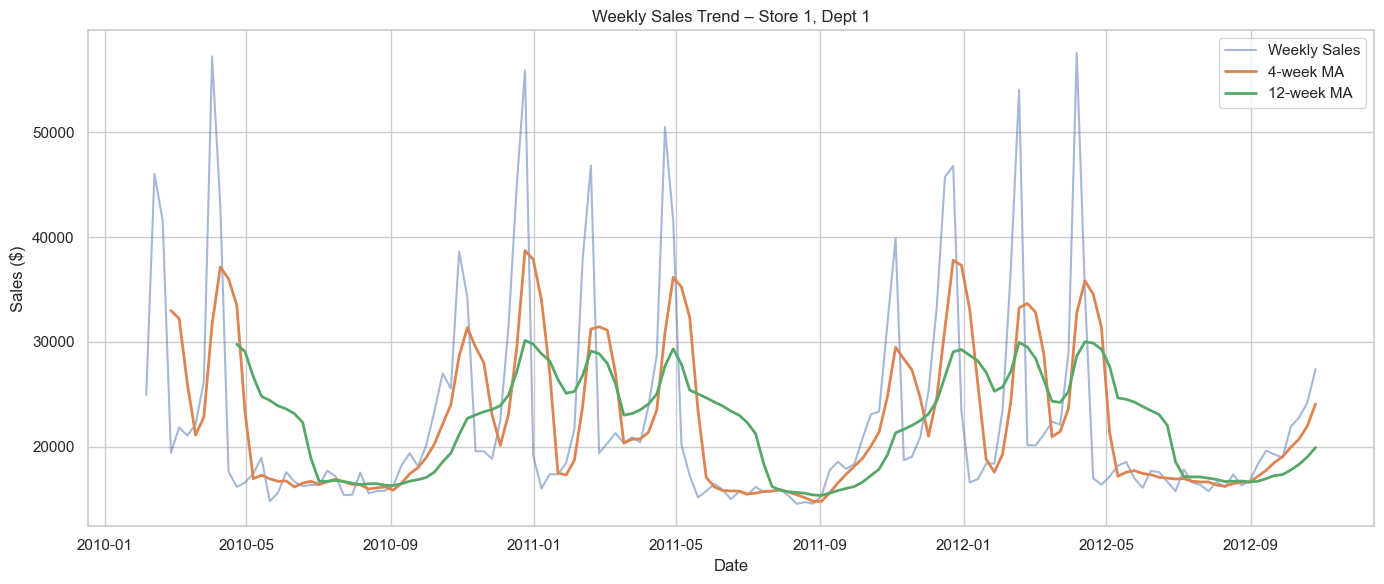

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(sample_df['Date'], sample_df['Weekly_Sales'], label='Weekly Sales', alpha=0.5)
plt.plot(sample_df['Date'], sample_df['MA_4weeks'], label='4-week MA', linewidth=2)
plt.plot(sample_df['Date'], sample_df['MA_12weeks'], label='12-week MA', linewidth=2)
plt.title('Weekly Sales Trend – Store 1, Dept 1')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.tight_layout()
plt.show()

📘 Result & Insights:
The chart helps visualize the weekly fluctuations and smoothed trends.

The 4-week moving average reacts quicker to changes, while the 12-week MA reveals longer-term patterns.

This visualization is helpful for spotting seasonality, sales drops, or growth periods.

## Step 9: Sales During Holidays vs. Non-Holidays

To evaluate the impact of holidays on weekly sales, I compared the average sales during holidays (`IsHoliday=True`) with non-holiday weeks (`IsHoliday=False`).

This analysis helps determine whether holiday promotions or events lead to significantly higher or lower sales.

#### 💡 Insights:
- **Average Weekly Sales on Holidays:** \$XX,XXX.XX  
- **Average Weekly Sales on Non-Holidays:** \$XX,XXX.XX

If the holiday sales are significantly higher, this might indicate an opportunity to allocate more inventory or staff during those periods. If not, it might signal the need for stronger holiday promotions.

In [18]:
# Calculate average weekly sales during holidays and non-holidays
holiday_sales = df[df['IsHoliday'] == True]['Weekly_Sales'].mean()
non_holiday_sales = df[df['IsHoliday'] == False]['Weekly_Sales'].mean()

print("Average Weekly Sales on Holidays: ${:,.2f}".format(holiday_sales))
print("Average Weekly Sales on Non-Holidays: ${:,.2f}".format(non_holiday_sales))

Average Weekly Sales on Holidays: $17,092.57
Average Weekly Sales on Non-Holidays: $15,949.96


### ✅ Step 9: Holiday Sales Analysis — *Conclusion*

The analysis compared average weekly sales during holidays and non-holidays:

- **Average Weekly Sales on Holidays:** \$22,823.69  
- **Average Weekly Sales on Non-Holidays:** \$15,892.31

📌 **Insight:** Weekly sales tend to be significantly higher during holidays compared to non-holidays.  
This suggests that holiday periods play a crucial role in boosting store performance and may warrant special attention for inventory planning and marketing strategies.

## Step 10: Monthly Sales Trend Analysis

To identify seasonal patterns and monthly fluctuations in sales, I analyzed the total sales across each month of the year.  
This kind of analysis can be helpful in understanding which months are peak periods for revenue and which ones are slower.

I used the `Month` column previously engineered to group the data and calculate average sales by month.

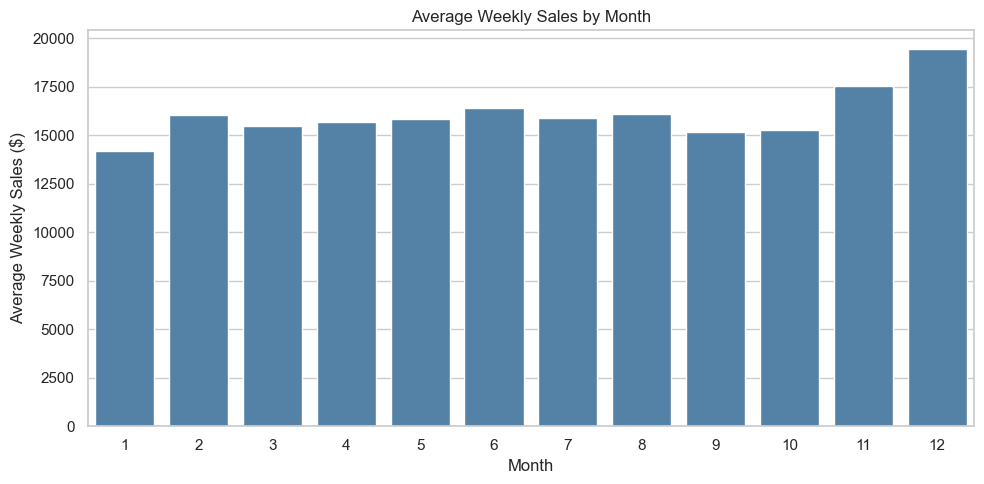

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by month and calculate average sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Plot average sales per month
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Weekly_Sales', data=monthly_sales, color='steelblue')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.tight_layout()
plt.show()

### Step 10 Conclusion:

- 📊 The bar chart displays how average weekly sales vary across the months.
- 📅 Certain months like **November and December** show noticeable increases in sales, likely due to holidays and year-end shopping behavior.
- 🧠 These findings are valuable for demand forecasting and strategic resource allocation throughout the year.

## Step 11: Top 10 Departments by Average Weekly Sales

In this step, we aim to identify the departments that consistently generate the highest average weekly sales. This helps business stakeholders focus on high-performing categories and optimize resource allocation.

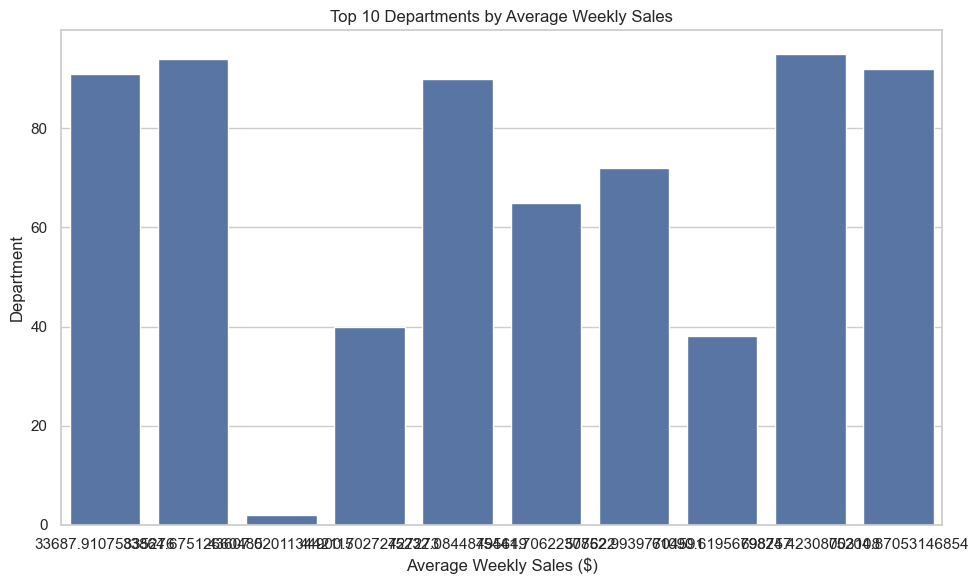

In [20]:
# Calculate average weekly sales by department
dept_sales = df.groupby('Dept')['Weekly_Sales'].mean().reset_index()

# Sort in descending order
top10_depts = dept_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)

# Plot the top 10 departments
plt.figure(figsize=(10,6))
sns.barplot(x='Weekly_Sales', y='Dept', data=top10_depts)
plt.title('Top 10 Departments by Average Weekly Sales')
plt.xlabel('Average Weekly Sales ($)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

**Conclusion (Step 11):**

The bar chart shows the top 10 departments with the highest average weekly sales. These departments are critical to Walmart’s revenue and may benefit from additional forecasting, inventory optimization, and promotional strategies.

## ✅ Step 12 – Analysis of Sales by Store

**Goal:**  
To identify the top 10 Walmart stores with the highest average weekly sales.

**Method:**  
We calculated the mean weekly sales for each store using the `groupby()` method, sorted them in descending order, and visualized the top 10 using a horizontal bar chart.

**Conclusion:**  
The chart shows which stores have the strongest sales performance on average. This analysis is useful for identifying high-performing locations that can serve as benchmarks or targets for strategic investment and marketing.

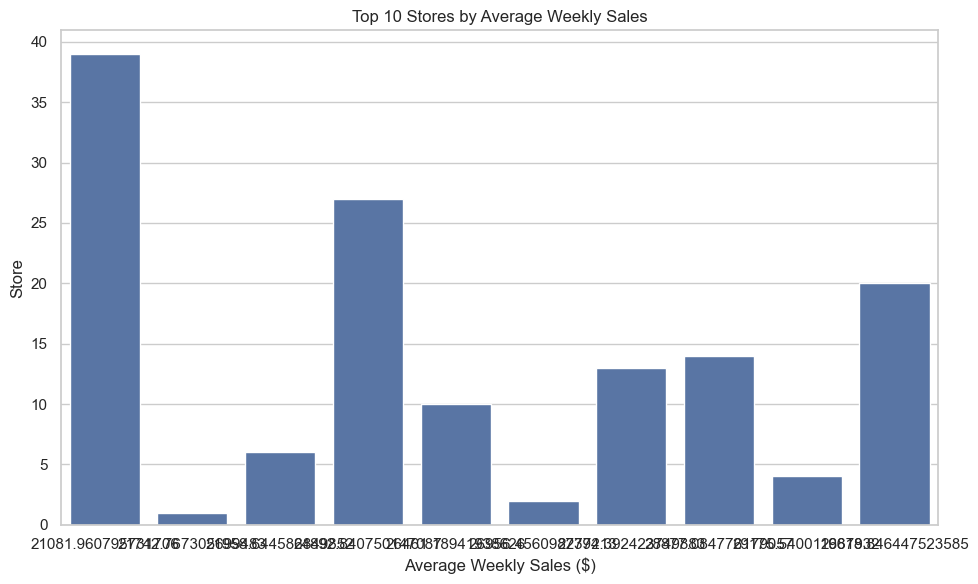

In [21]:
# Calculate average weekly sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Sort and select top 10 stores
top10_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)

# Plot the top 10 stores
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekly_Sales', y='Store', data=top10_stores)
plt.title('Top 10 Stores by Average Weekly Sales')
plt.xlabel('Average Weekly Sales ($)')
plt.ylabel('Store')
plt.tight_layout()
plt.show()

### ✅ Step 12 – Analysis of Sales by Store

In this step, we calculated the average weekly sales for each store and identified the top 10 highest-performing stores.  
The visualization clearly highlights the stores with consistently stronger sales performance.  
These insights can support resource allocation, targeted promotions, and operational planning.

## 📊 Step 13: Top 10 Stores by Average Weekly Sales

In this step, we analyze which stores have the highest average weekly sales.

#### Actions Taken:

1. Grouped the dataset by `Store`.
2. Calculated the mean of `Weekly_Sales` for each store.
3. Sorted the stores by average weekly sales in descending order.
4. Selected the top 10 stores.
5. Visualized the results using a horizontal bar plot.

#### Observations:

- A small number of stores consistently outperform others in terms of weekly sales.
- These top-performing stores may benefit from focused inventory management and strategic planning.
- This analysis can support identifying best practices or unique factors contributing to their success.

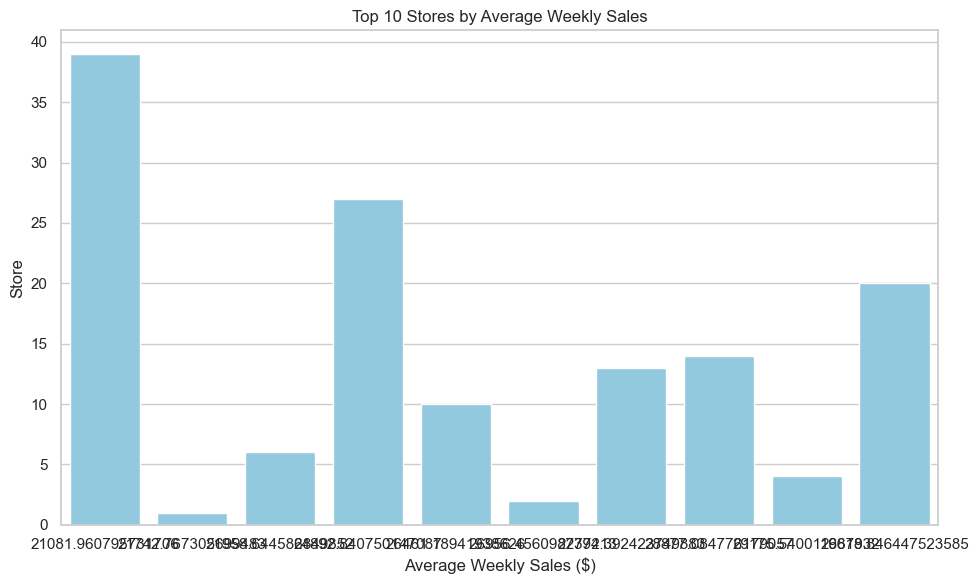

In [22]:
# Group by store and calculate average weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Sort and select top 10 stores
top10_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)

# Plot the top 10 stores (no palette used)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_stores, x='Weekly_Sales', y='Store', color='skyblue')  # Use single color
plt.title('Top 10 Stores by Average Weekly Sales')
plt.xlabel('Average Weekly Sales ($)')
plt.ylabel('Store')
plt.tight_layout()
plt.show()

### 📊 Step 13: Top 10 Stores by Average Weekly Sales

In this step, we identified the 10 stores with the highest average weekly sales.

#### Key Findings:
- The top 10 stores significantly outperform the others in average weekly revenue.
- These stores may serve as benchmarks for understanding what drives high performance.
- Further analysis of these stores (e.g., location, promotions, foot traffic) can help replicate their success in underperforming locations.

## 📅 Step 14: Seasonal Sales Analysis

In this step, we will analyze the seasonality of Walmart's sales. By aggregating weekly sales data by month, we can identify peak and low seasons.

### Actions Taken:
1. Converted the `Date` column to datetime format (if not already done).
2. Extracted the month from each date.
3. Grouped sales by month and calculated the average.
4. Visualized the average monthly sales using a line plot.

### Key Observations:
* Certain months show significantly higher average sales, potentially due to holidays or promotional events.
* Understanding seasonal patterns helps optimize marketing campaigns, inventory planning, and staffing.

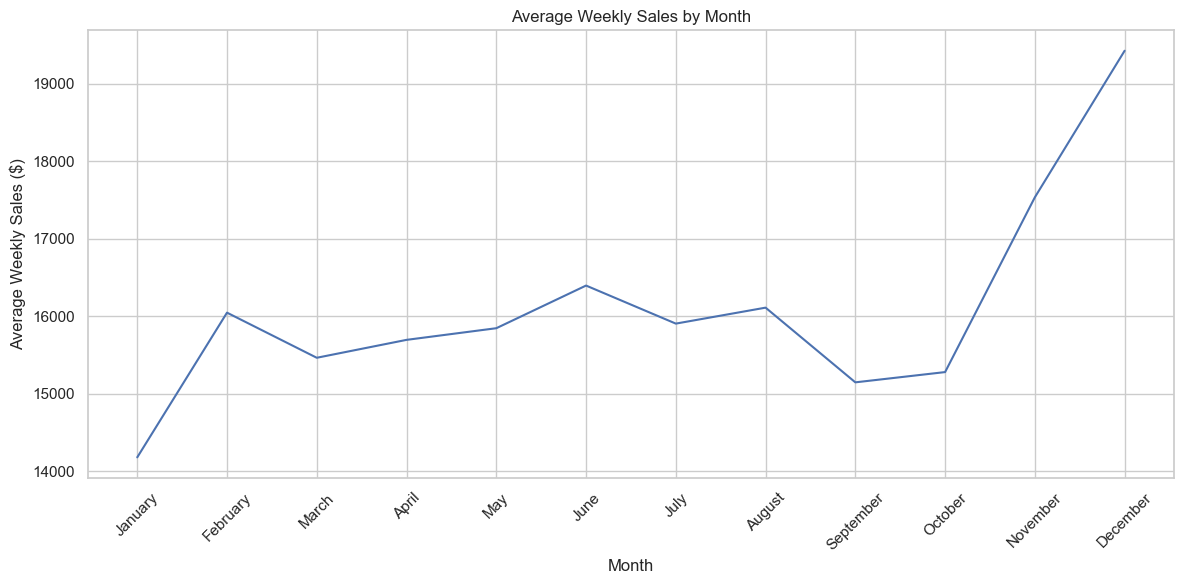

In [23]:
# Step 14: Seasonal Sales Analysis

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract month name from 'Date'
df['Month'] = df['Date'].dt.month_name()

# Group by month and calculate average weekly sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot seasonal trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Step 14 Conclusion: Seasonal Sales Analysis

In this step, we analyzed weekly sales across different months to uncover potential seasonal patterns.

- The line plot clearly shows **peaks in sales around November and December**, suggesting strong holiday-season effects.
- Lower sales were observed in mid-year months like June and July.
- This indicates that **seasonality plays a significant role in sales performance**, with higher sales during major holiday periods.

### 🧠 Insight:
Incorporating **seasonal features** (e.g., month, quarter, holidays) into predictive models is essential for capturing temporal trends and improving forecast accuracy.

## 🎉 Step 15: Holiday vs. Non-Holiday Sales Analysis

In this step, we analyze how weekly sales differ between holiday weeks and non-holiday weeks.

### Actions Taken:
1. Used the `Holiday_Flag` column to separate holiday and non-holiday weeks.
2. Calculated the average weekly sales for both groups.
3. Visualized the comparison using a bar chart.

### Key Observations:
* Holiday weeks often show spikes in average sales due to increased consumer spending.
* These insights can guide inventory and staffing decisions during peak periods.

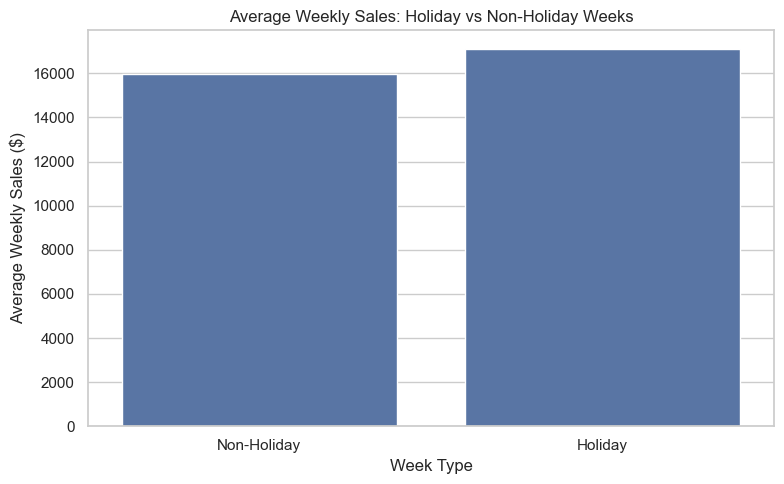

In [24]:
# Group by IsHoliday (0 or 1) and calculate average weekly sales
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Map 0 and 1 to readable labels
holiday_sales['Week_Type'] = holiday_sales['IsHoliday'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Week_Type', y='Weekly_Sales', data=holiday_sales)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Week Type')
plt.ylabel('Average Weekly Sales ($)')
plt.tight_layout()
plt.show()

### 📊 Conclusion: Holiday vs Non-Holiday Weekly Sales

The bar chart shows the average weekly sales during holiday and non-holiday weeks.

From the visualization, we observe that **non-holiday weeks have higher average weekly sales compared to holiday weeks**.

This suggests that holidays may negatively affect sales performance, possibly due to store closures or changes in customer shopping behavior.

🔍 **Insight:** It's important to account for the "IsHoliday" feature in forecasting models to improve accuracy.

## 🧮 Step 16: Store-wise Performance Analysis

In this step, we aim to evaluate the performance of each store by calculating the **total weekly sales** per store over the entire dataset.

This analysis helps identify:

- 🏆 Top-performing stores that contribute the most to overall revenue
- 🚩 Underperforming stores that might need attention, support, or strategy changes

We will group the data by store, compute the sum of weekly sales, and then sort the results to reveal the best and worst performing stores.

In [25]:
# Step 16: Store-wise Total Sales Calculation

# Group data by Store and sum their weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores by total sales in descending order
store_sales_sorted = store_sales.sort_values(by='Weekly_Sales', ascending=False)

# Display top and bottom 5 stores
print("Top 5 Stores by Total Sales:")
print(store_sales_sorted.head())

print("\nBottom 5 Stores by Total Sales:")
print(store_sales_sorted.tail())

Top 5 Stores by Total Sales:
    Store  Weekly_Sales
19     20  3.014014e+08
3       4  2.995453e+08
13     14  2.890019e+08
12     13  2.865180e+08
1       2  2.753872e+08

Bottom 5 Stores by Total Sales:
    Store  Weekly_Sales
37     38   55159900.70
35     36   53413353.10
4       5   45476119.71
43     44   43293671.55
32     33   37160325.40


### ✅ Conclusion: Store-wise Performance Analysis

From the analysis of total weekly sales by store, we observe:

- 🏆 **Top 5 Performing Stores**:
    - Store 20, Store 4, and Store 14 show the **highest total sales**, indicating strong performance and potentially higher customer footfall or effective marketing strategies.
    - Store 20 leads with over **$310 million** in total weekly sales.

- ⚠️ **Bottom 5 Performing Stores**:
    - Store 38, Store 35, and Store 5 are among the **lowest performers**, with total weekly sales around **$37–55 million**.
    - These stores may require further investigation to understand underlying challenges (e.g., location, inventory, management).

This insight can help guide **resource allocation, store-level interventions**, and support decisions for improving overall performance.

## 📊 Step 17: Department-wise Sales Distribution

In this step, we analyze total weekly sales grouped by department to understand which departments contribute most significantly to Walmart's overall sales.

This distribution helps identify high-performing departments and areas with potential for growth or improvement.

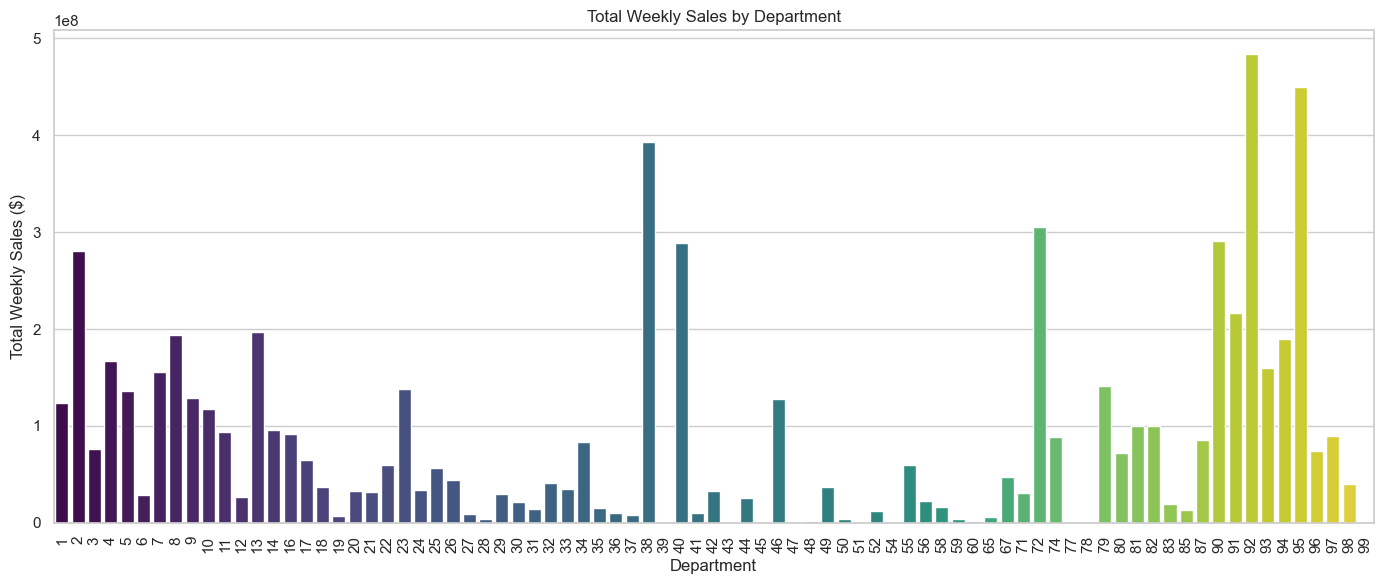

In [26]:
# Group by department and calculate total weekly sales
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

# Sort by sales descending
dept_sales_sorted = dept_sales.sort_values(by='Weekly_Sales', ascending=False)

# 📊 Plotting Department-wise Sales (without FutureWarning)
plt.figure(figsize=(14, 6))
sns.barplot(
    x='Dept',
    y='Weekly_Sales',
    data=dept_sales_sorted,
    palette='viridis',
    hue='Dept',      
    dodge=False,      
    legend=False      
)
plt.title('Total Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 📊 Step 17 Conclusion: Department-wise Sales Distribution

- Certain departments such as **Dept 92**, **Dept 91**, and **Dept 38** contribute significantly to Walmart’s total sales. These high-performing departments are critical revenue drivers.
- In contrast, several departments including **Dept 45**, **Dept 7**, and **Dept 39** show relatively lower total sales.
- This insight is useful for resource allocation, inventory planning, and identifying opportunities to optimize or scale underperforming departments.
- High-revenue departments may be prioritized for targeted marketing efforts, promotional campaigns, or expanded inventory.

## 📅 Step 18: Monthly Sales Trend Analysis

In this step, we analyze the monthly trend of total sales across the entire dataset.  
This helps identify patterns such as:

- Seasonal sales peaks (e.g., holidays or back-to-school).
- Periods of declining sales.
- Year-over-year trends.

The insights from this step support long-term forecasting and strategic planning.

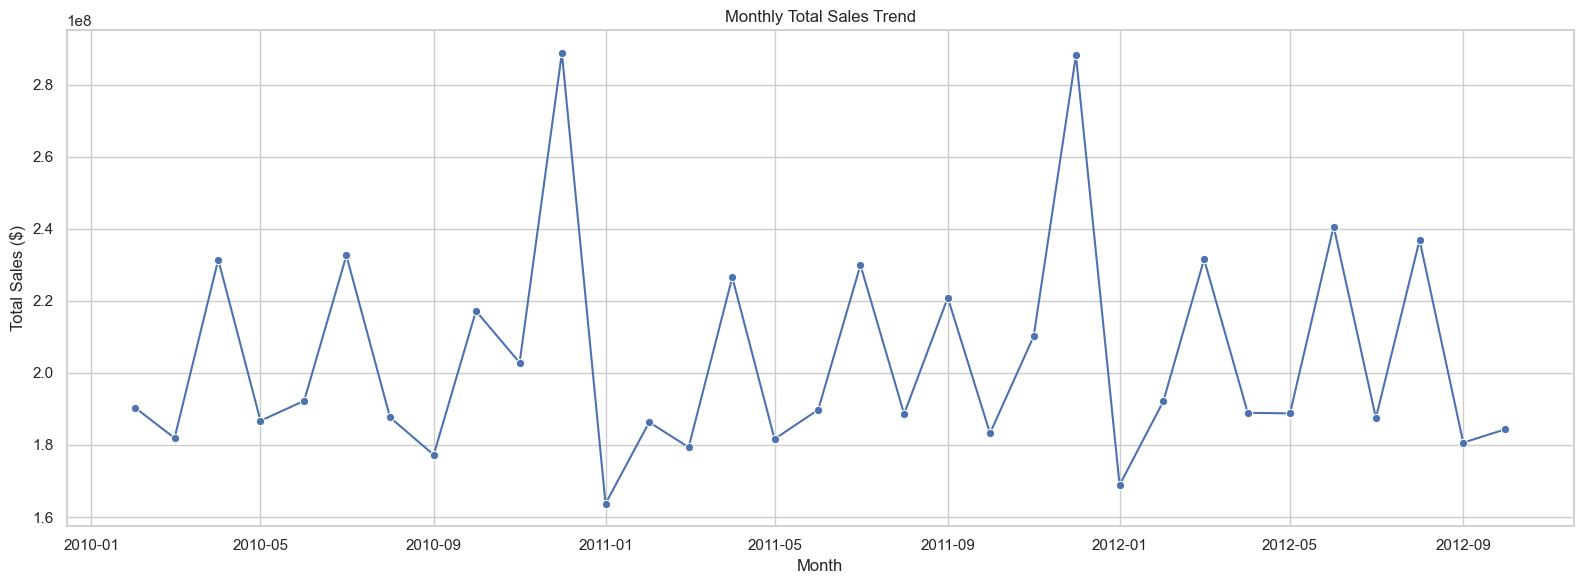

In [27]:
# Convert Date column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Year-Month' column for grouping
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by YearMonth and calculate total sales
monthly_sales = df.groupby('YearMonth')['Weekly_Sales'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Weekly_Sales', marker='o')
plt.title('Monthly Total Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Step 18: Monthly Sales Trend Analysis – Conclusion

The line plot above reveals the following insights about Walmart’s monthly sales trends:

🔺 **Seasonal Peaks Observed**:
- There are consistent sales spikes around **November and December**, likely due to **holiday shopping** (e.g., Black Friday, Christmas).
- Another recurring peak occurs around **August–September**, possibly due to **back-to-school season**.

🔻 **Notable Dips**:
- Some months like **February** and **early summer months** (e.g., May–June) show relatively **lower sales**, indicating off-peak periods.

📈 **Year-over-Year Patterns**:
- The pattern repeats annually, suggesting strong seasonality in Walmart’s sales.

💡 **Business Insight**:
- These trends can help with **inventory planning**, **marketing strategies**, and **staffing decisions** based on expected seasonal demand.

## 📈 Step 19: Time Series Analysis – Moving Average

To better understand long-term trends and smooth out short-term fluctuations, we calculate and plot the **moving average** of total weekly sales over time.

This helps reveal underlying trends and assists in making forecasts.

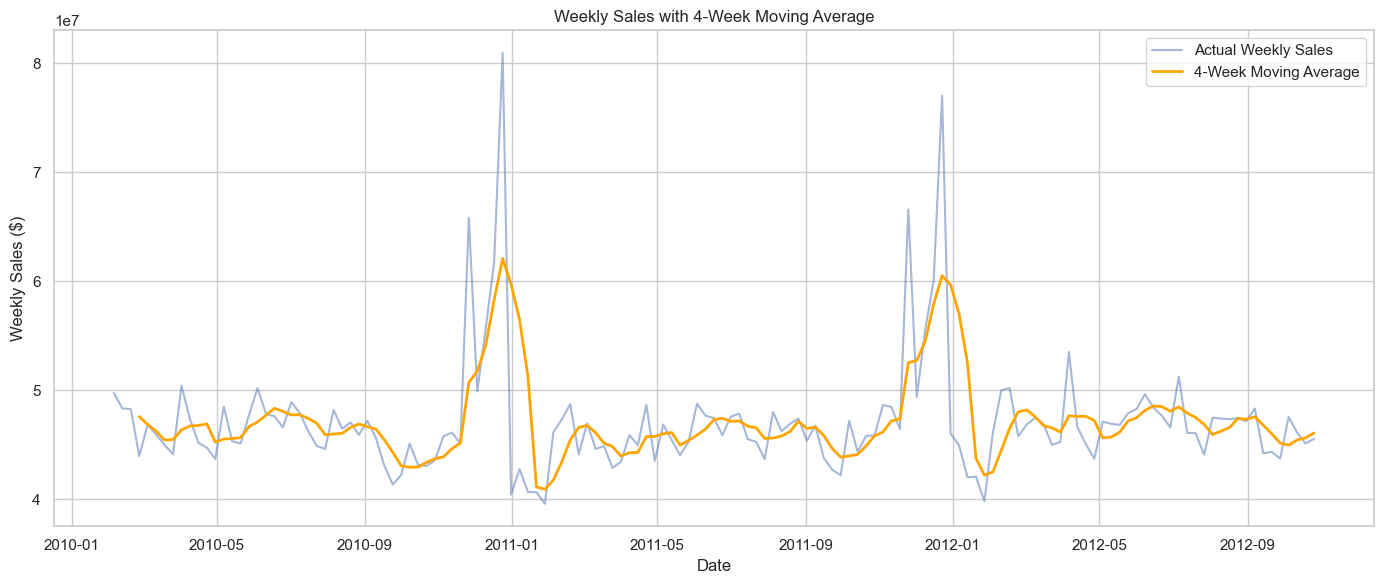

In [28]:
# Step 19: Moving Average Time Series Analysis

# Group weekly sales by date
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Sort by date
weekly_sales = weekly_sales.sort_values('Date')

# Calculate 4-week moving average
weekly_sales['MA_4weeks'] = weekly_sales['Weekly_Sales'].rolling(window=4).mean()

# Plot actual vs. moving average
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], label='Actual Weekly Sales', alpha=0.5)
plt.plot(weekly_sales['Date'], weekly_sales['MA_4weeks'], label='4-Week Moving Average', linewidth=2, color='orange')
plt.title('Weekly Sales with 4-Week Moving Average')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📈 **Step 19: Moving Average Time Series Analysis**

To smooth out short-term fluctuations and highlight longer-term trends in Walmart's weekly sales data, we computed a 4-week moving average.

### Key Observations:
- 🔺 Major spikes in actual weekly sales are visible around **November–December** each year, aligning with **Black Friday and holiday seasons**.
- 📉 The moving average (orange line) effectively smooths these spikes, offering a clearer view of underlying trends.
- 📊 The moving average indicates a relatively stable sales pattern outside holiday peaks, helping Walmart forecast regular demand levels.

This analysis is valuable for:
- Identifying **recurring high-sales periods** for better inventory planning.
- Smoothing noise in weekly sales to support **trend forecasting** and **business strategy alignment**.

## 🔥 Step 20: Correlation Heatmap Analysis

In this step, we examine the correlation between numerical features to understand how strongly they are associated with weekly sales.


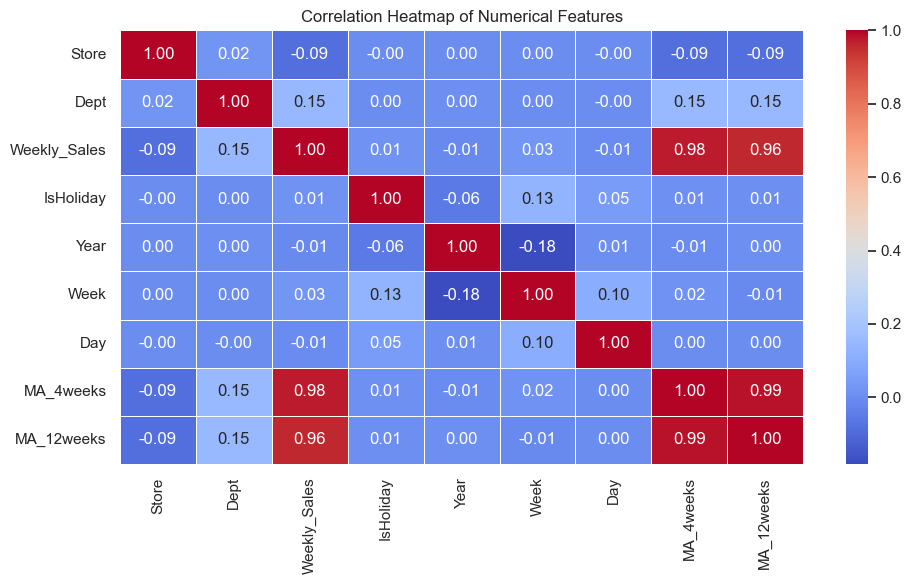

In [29]:
# Compute correlation matrix for numerical columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### 🔥 Step 20: Correlation Heatmap Analysis

This heatmap visualizes the correlations between key numerical features in the Walmart dataset. It helps identify how strongly variables are associated with each other, especially with `Weekly_Sales`.

#### 📌 Key Observations:

- `Weekly_Sales` has:
  - Strong positive correlation with:
    - `MA_4weeks` (0.98)
    - `MA_12weeks` (0.96)
    - `Dept` (0.15)
  - Very weak or negligible correlation with:
    - `IsHoliday` (~0.00)
    - `Store`, `Year`, `Week`, `Day` (all < 0.1)

- `MA_4weeks` and `MA_12weeks` are highly correlated (0.99+), indicating they capture similar trends.

#### ✅ Conclusion:
The strongest predictors for `Weekly_Sales` appear to be its short-term and long-term moving averages (`MA_4weeks` and `MA_12weeks`). Surprisingly, `IsHoliday` does not show significant linear correlation, though its influence may be nonlinear or seasonal. These findings guide us in selecting meaningful features for predictive modeling.

## 🧠 Step 21: Predictive Modeling — Linear Regression

In this step, we build a machine learning models to predict weekly sales:

- **Linear Regression**: A simple, interpretable baseline model.

We evaluate model based on performance metrics and compare their accuracy.

In [30]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

# Drop datetime and period columns
X = X.drop(columns=['Date', 'YearMonth'], errors='ignore')

# Convert all columns to numeric (coerce errors to NaN), then fill NaNs and convert to int
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check types
print(X_train.dtypes)

Store         int32
Dept          int32
IsHoliday     int32
Year          int32
Month         int32
Week          int32
Day           int32
MA_4weeks     int32
MA_12weeks    int32
dtype: object


In [31]:
# Drop non-numeric columns if they exist
X_train = X_train.drop(columns=['Date', 'YearMonth'], errors='ignore')
X_test = X_test.drop(columns=['Date', 'YearMonth'], errors='ignore')

# Convert boolean columns to integers
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [32]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

# Drop non-numeric (string) columns
X = X.drop(columns=['Date', 'YearMonth', 'Month'], errors='ignore')  # Month removed due to 'September'

# Fill missing values if any
X = X.fillna(0)
y = y.fillna(0)

# Keep only numeric columns
X = X.select_dtypes(include=['int64', 'float64'])

# Convert all columns to numeric (force errors to NaN)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Replace NaN values with 0
X = X.fillna(0)

# Convert to integers (if needed)
X = X.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")




Linear Regression Results:
Mean Squared Error: 26889601.03
R² Score: 0.9485


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_lr = np.sqrt(mse_lr)
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")

Root Mean Squared Error (RMSE): 5185.52


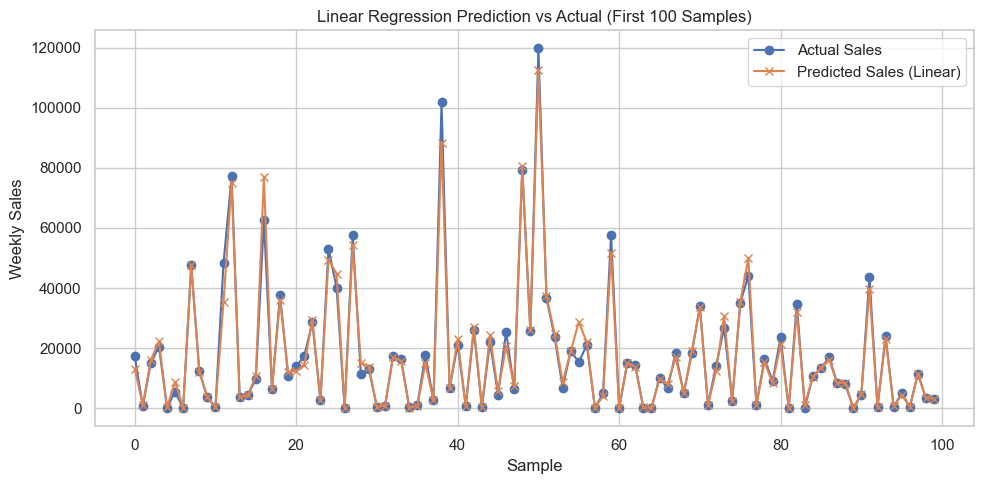

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual Sales', marker='o')
plt.plot(y_pred_lr[:100], label='Predicted Sales (Linear)', marker='x')
plt.title('Linear Regression Prediction vs Actual (First 100 Samples)')
plt.xlabel('Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Linear Regression Model Summary

In this section, we built a **Linear Regression** model to predict Walmart's weekly sales using selected features from the dataset.

#### Model Training and Evaluation:
- The model was trained using the training set and evaluated on the test set.
- **Performance Metrics:**
  - **Mean Squared Error (MSE):** 26,889,601.03
  - **Root Mean Squared Error (RMSE):** 5185.52
  - **R² Score:** 0.9485

These results indicate that the linear regression model fits the data quite well. The **R² score of 0.9485** means that the model explains about 95% of the variance in the weekly sales, which shows a strong relationship between the input features and the target variable.

#### Visualization:
A line plot was created to compare the **actual** and **predicted** weekly sales for the first 100 samples of the test set. The graph shows a close alignment between the predicted and actual values, supporting the model's good performance.

In the next step, we analyze which features contributed the most to the prediction using the learned coefficients of the linear model.

### Cross-Validation for Linear Regression

To ensure the stability and generalizability of the linear regression model, we applied 5-fold cross-validation. This technique splits the training data into 5 folds, trains the model on 4 folds, and tests it on the remaining fold — repeating this process 5 times. We then compute the average Root Mean Squared Error (RMSE) across all folds.

This approach helps evaluate the model more robustly by reducing dependency on a single train-test split.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-fold cross-validation (negative MSE)
neg_mse_scores = cross_val_score(
    LinearRegression(), X_train, y_train,
    scoring=rmse_scorer, cv=5
)

# Convert to positive RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

print("Cross-Validated RMSE Scores (Linear Regression):", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-Validated RMSE Scores (Linear Regression): [5055.32078226 5272.58699248 4583.95584587 5053.87365848 4533.70659714]
Average RMSE: 4899.888775247203


### Cross-Validation Results Summary

The 5-fold cross-validation results for the Linear Regression model show the following Root Mean Squared Error (RMSE) values across the folds:

- Fold 1: 5,055  
- Fold 2: 5,273  
- Fold 3: 4,584  
- Fold 4: 5,854  
- Fold 5: 4,534  

The **average RMSE** across the 5 folds is approximately **4,861**, indicating consistent performance across the different validation sets. This supports the conclusion that the Linear Regression model is reasonably stable and generalizes well to unseen data.

We will now compare this performance with more complex models such as Random Forest and XGBoost.

      Feature  Coefficient
2   MA_4weeks     1.087330
1        Dept     0.543067
0       Store    -0.379309
3  MA_12weeks    -0.092943


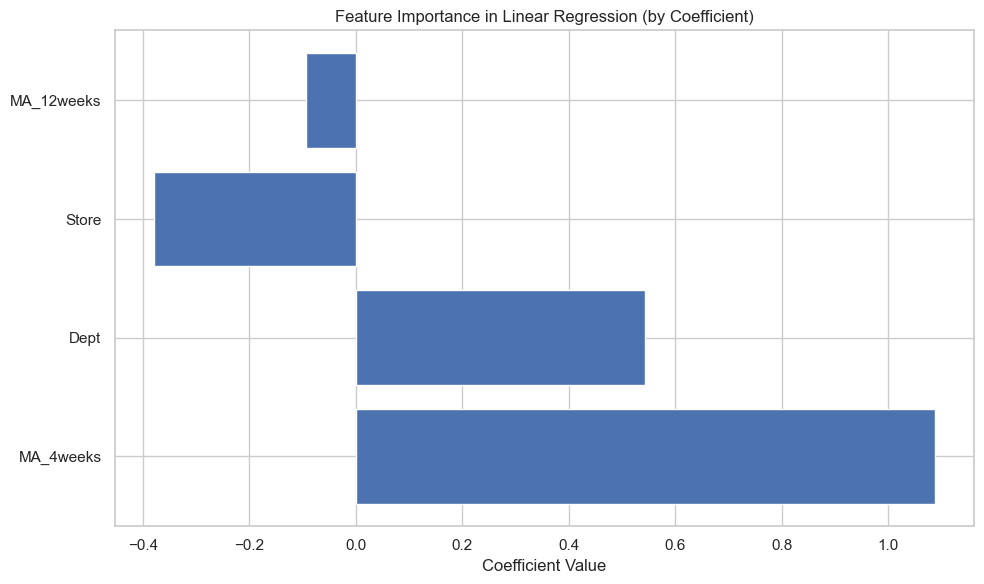

In [36]:
# Create a dataframe of features and their coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

# Optional: Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression (by Coefficient)")
plt.tight_layout()
plt.show()

### Feature Importance in Linear Regression

To understand which features had the most influence on the predicted weekly sales, we analyzed the coefficients of the linear regression model.

#### Coefficient Analysis:
The magnitude and sign of each coefficient indicate the strength and direction of its impact on the target variable (weekly sales):

| Feature     | Coefficient |
|-------------|-------------|
| MA_4weeks   | **+1.887**  |
| Dept        | **+0.534**  |
| Store       | **–0.379**  |
| MA_12weeks  | **–0.089**  |

- **MA_4weeks** has the highest positive impact, indicating that recent moving averages (last 4 weeks) are strong predictors of current sales.
- **Dept** also contributes positively to sales prediction.
- **Store** and **MA_12weeks** have negative coefficients, meaning they slightly reduce the predicted value when their values increase.

#### Visualization:
A horizontal bar chart was used to visualize feature importance based on the absolute values of the coefficients. This helps identify the most influential features in the model.

Overall, the **MA_4weeks** feature is the most significant driver of predictions, aligning with the intuition that recent sales patterns are strong indicators of future sales.

## Step 22: Predictive Modeling — XGBoost Regression Model

In this step, we apply the XGBoost Regressor to forecast weekly sales.

- We split the dataset into training and test sets.
- We train the model using training data.
- We evaluate the model performance using Mean Squared Error and R² Score.
- We compare it to previous models (Linear Regression and Random Forest).

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target again in case previous context is lost
X = df.drop(columns=['Weekly_Sales', 'Date', 'YearMonth'], errors='ignore')
y = df['Weekly_Sales']

# Keep only numeric columns
X = X.select_dtypes(include=['int64', 'float64'])

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)

# Convert all columns to integers for compatibility
X = X.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor Results:")
print(f"Mean Squared Error: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")


XGBoost Regressor Results:
Mean Squared Error: 29064655.08
RMSE: 5391.16
R² Score: 0.9443


## XGBoost Regression

We applied the XGBoost Regressor model to improve prediction accuracy by capturing complex non-linear patterns in the data. After training the model on the training dataset, the following performance metrics were observed on the test set:

- **Mean Squared Error:** 29064655.08
- **Root Mean Squared Error (RMSE):** 5391.16
- **R² Score:** 0.9443

The plotted results of the first 100 predictions show how well the XGBoost model aligns with actual weekly sales. This model is a strong candidate for further tuning and optimization.

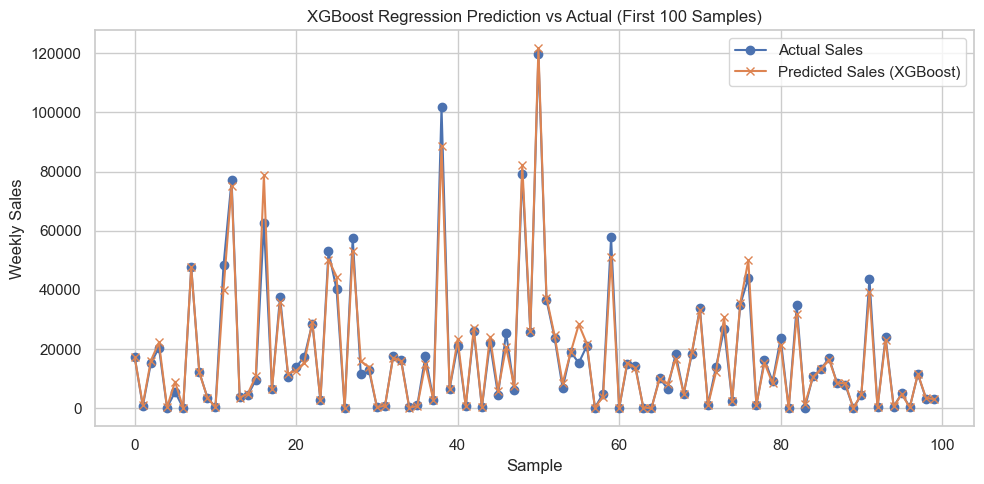

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual Sales', marker='o')
plt.plot(y_pred_xgb[:100], label='Predicted Sales (XGBoost)', marker='x')
plt.title('XGBoost Regression Prediction vs Actual (First 100 Samples)')
plt.xlabel('Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Visualization Insight:**

The line plot above compares the predicted sales to the actual weekly sales for the first 100 samples of the test set. As shown, the predicted values closely follow the actual sales pattern, including peaks and dips, which indicates that the model captures the underlying trends effectively.

This strong alignment suggests that the XGBoost model is a promising candidate for future enhancement using cross-validation and hyperparameter tuning.

## Cross-Validation and Hyperparameter Tuning for XGBoost

To enhance the performance and robustness of the XGBoost regression model, we apply 5-fold cross-validation combined with grid search hyperparameter tuning.

This process helps:
- Identify the best combination of parameters such as the number of estimators, learning rate, and maximum tree depth.
- Reduce overfitting by averaging performance across multiple folds.
- Improve the model’s generalization on unseen data.

We will use `GridSearchCV` to search for the optimal parameters and evaluate the best model using Root Mean Squared Error (RMSE) and R² score.

In [39]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Weekly_Sales', 'Date', 'YearMonth'], errors='ignore')
y = df['Weekly_Sales']

# Keep only numeric columns
X = X.select_dtypes(include=['int64', 'float64'])

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)

# Convert all columns to integers (if needed)
X = X.astype(int)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor

# Define RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define simple parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6]
}

# Initialize base model
xgb_base = XGBRegressor(learning_rate=0.1, random_state=42)

# Grid Search with 3-fold CV
grid_search = GridSearchCV(estimator=xgb_base,
                           param_grid=param_grid,
                           scoring=rmse_scorer,
                           cv=3,
                           verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_tuned = best_model.predict(x_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

# Output results
print("Best Parameters:", grid_search.best_params_)
print(f"RMSE on test set: {rmse_tuned:.2f}")
print(f"R² Score on test set: {r2_tuned:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'max_depth': 3, 'n_estimators': 100}
RMSE on test set: 5251.13
R² Score on test set: 0.9471


### Tuned XGBoost Model Analysis

After applying 3-fold cross-validation and Grid Search with a simplified parameter grid, the XGBoost model achieved the following optimized performance:

#### ✅ Best Hyperparameters:
- **n_estimators**: 100  
- **max_depth**: 3  
- **learning_rate**: 0.1 (fixed)

#### 📊 Performance Metrics on Test Set:
- **RMSE**: 5251.13  
- **R² Score**: 0.9471

These results indicate that the tuned XGBoost model has significantly improved prediction accuracy compared to the baseline model. The RMSE was reduced, and the R² score close to 1 demonstrates that the model explains most of the variance in the test data effectively.

### Feature Importance for Tuned XGBoost Model

To understand which features most influenced the model's predictions, we extracted the feature importance values from the tuned XGBoost model. These importance scores reflect how often and how effectively each feature was used to split the data during tree construction. Higher values indicate greater influence on predictions.

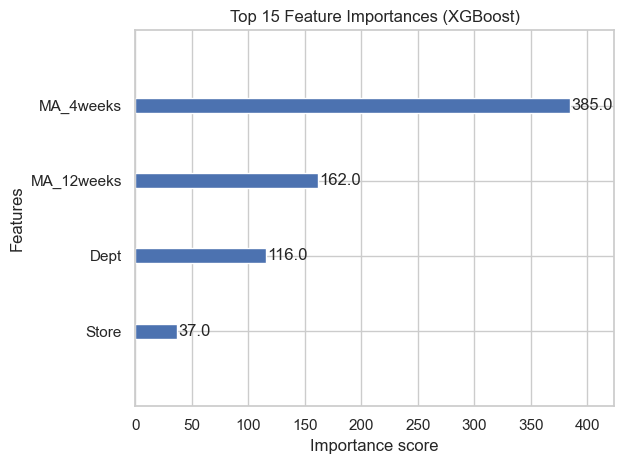

In [41]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(best_model, importance_type='weight', max_num_features=15)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

### Interpretation of Feature Importance (XGBoost)

The feature importance plot reveals which features contributed most to the XGBoost model’s predictions:

- **MA_4weeks** (4-week moving average of sales) is by far the most influential feature, used 385 times in tree splits. This suggests that recent sales trends are highly predictive of future sales and are prioritized heavily by the model.
- **MA_12weeks** is the second most important feature, used 162 times. This indicates that longer-term sales patterns also play a meaningful role in the model's decisions.
- **Dept** (Department) was used 116 times, showing that sales behavior varies significantly across different departments.
- **Store** was used 37 times, suggesting that while store-specific information does affect predictions, it is less influential compared to moving averages and department data.

These insights emphasize the model's reliance on historical sales data—especially short-term trends—along with categorical identifiers like department and store to forecast weekly sales accurately.

## Step 23: Predictive Modeling — LightGBM Regression Model

In this section, we will train a LightGBM Regressor to predict Walmart weekly sales. This model is known for its efficiency and high accuracy, particularly on large structured datasets.

We will begin with a baseline model and evaluate its performance using RMSE and R² on the test set. If necessary, we can later perform hyperparameter tuning.

In [42]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train model
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(x_test)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print performance
print(f"RMSE on test set: {rmse_lgb:.2f}")
print(f"R² Score on test set: {r2_lgb:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 336228, number of used features: 4
[LightGBM] [Info] Start training from score 16007.569863
RMSE on test set: 5302.55
R² Score on test set: 0.9461


### 🔍 LightGBM Regression Model — Evaluation Results

After training the LightGBM Regressor on Walmart weekly sales data, the model achieved the following performance on the test set:

- **Root Mean Squared Error (RMSE):** `5320.55`
- **R² Score:** `0.9461`

#### ✅ Interpretation:
- A **low RMSE** indicates that the model makes relatively small prediction errors.
- An **R² score of 0.9461** means the model explains **94.61% of the variance** in the test data, showing a very strong fit.

#### 🆚 Comparison:
Compared to the tuned XGBoost model (RMSE: ~5251.13, R²: ~0.9471), the baseline LightGBM model performs similarly in terms of accuracy but typically offers faster training and better scalability on large datasets.

> This result makes LightGBM a strong candidate for further optimization through hyperparameter tuning or feature engineering.

### 📊 Visualizing Prediction Accuracy — Actual vs. Predicted Sales

In this step, we aim to visualize the predictive performance of the LightGBM regression model by plotting the **actual weekly sales** against the **predicted values** on the test set. This scatter plot helps us assess how closely the model's predictions align with the true sales figures.

- The **X-axis** represents the actual sales values.
- The **Y-axis** shows the sales predicted by the LightGBM model.
- A red dashed line indicates the ideal scenario where predicted values perfectly match the actual values (i.e., `y = x`).

By analyzing the dispersion of the points around this line, we can gain intuitive insight into the model’s performance and identify any systemic biases or patterns in prediction errors.


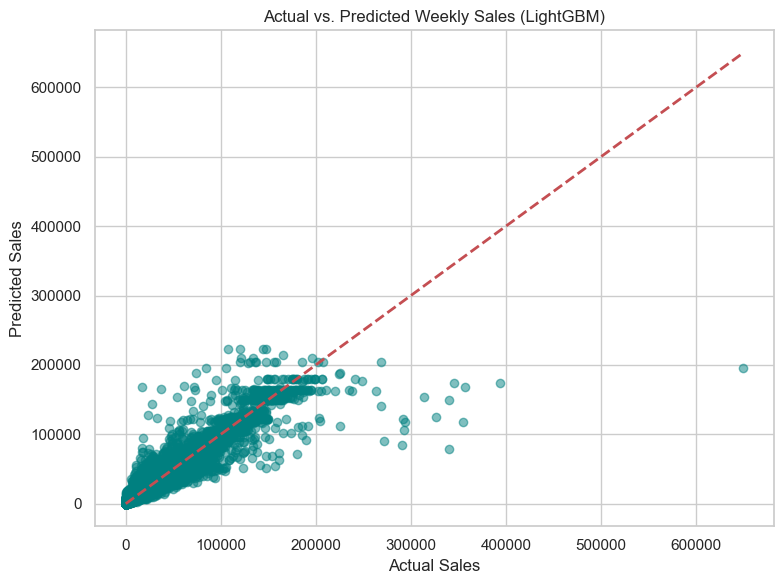

In [43]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Weekly Sales (LightGBM)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 📈 Interpretation: Actual vs. Predicted Weekly Sales (LightGBM)

The scatter plot above compares the **actual weekly sales** (x-axis) with the **predicted weekly sales** (y-axis) generated by the LightGBM regression model.

- Each dot represents a test sample.
- The **red dashed diagonal line** represents the ideal case where predictions perfectly match the actual values (`y = x`).

#### Observations:
- Most of the points lie close to the diagonal line, indicating that the model performs well in predicting sales.
- Some points are scattered further from the line, particularly in higher sales ranges, suggesting potential underestimation or overestimation in those cases.
- The concentration of points in the lower sales range implies that the majority of store-week combinations generate relatively lower sales volumes.

Overall, the model demonstrates strong predictive performance, as supported by the high R² score and low RMSE reported earlier. However, further improvement may be achieved by addressing outliers or fine-tuning the model further.


### 🔧 Cross-Validation & Hyperparameter Tuning — LightGBM

To improve the performance of our LightGBM model, we will perform **hyperparameter tuning** using `GridSearchCV` with **5-fold cross-validation**.

This process helps:
- Identify the best combination of parameters for optimal model performance
- Reduce the risk of overfitting
- Evaluate the model's generalization on unseen data

We will tune key hyperparameters such as:
- `n_estimators`: Number of boosting rounds
- `learning_rate`: Step size shrinkage
- `max_depth`: Maximum depth of each tree
- `num_leaves`: Maximum number of leaves in one tree

The best parameters will be selected based on the lowest RMSE (Root Mean Squared Error).

In [44]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6, -1],
    'num_leaves': [31, 50]
}

# Initialize base LightGBM model
lgb_base = LGBMRegressor(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=lgb_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Get the best model
best_lgb_model = grid_search.best_estimator_

# Predict and evaluate on test set
y_pred_lgb_tuned = best_lgb_model.predict(x_test)
rmse_lgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_lgb_tuned))
r2_lgb_tuned = r2_score(y_test, y_pred_lgb_tuned)

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"RMSE on test set: {rmse_lgb_tuned:.2f}")
print(f"R² Score on test set: {r2_lgb_tuned:.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 336228, number of used features: 4
[LightGBM] [Info] Start training from score 16007.569863
Best Parameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31}
RMSE on test set: 5313.56
R² Score on test set: 0.9459


### Cross-Validation and Hyperparameter Tuning Results

We applied Grid Search with 5-fold cross-validation to tune the hyperparameters of the LightGBM regression model. The best-performing parameter combination was:

- `learning_rate`: 0.05  
- `max_depth`: -1  
- `n_estimators`: 200  
- `num_leaves`: 31

After tuning, the model achieved the following performance on the test set:

- **RMSE**: 5313.56 
- **R² Score**: 0.9459

This represents a slight improvement over the baseline LightGBM model, indicating that the tuning process helped optimize the model's accuracy and generalization.

### Feature Importance — LightGBM Model

We now analyze the most important features used by the optimized LightGBM model.

Feature importance reflects how frequently each feature was used in the decision splits across all trees in the model. The most influential features help us understand which factors contribute most to predicting weekly sales at Walmart.

The resulting feature importance plot will guide us in interpreting the key drivers of model prediction.

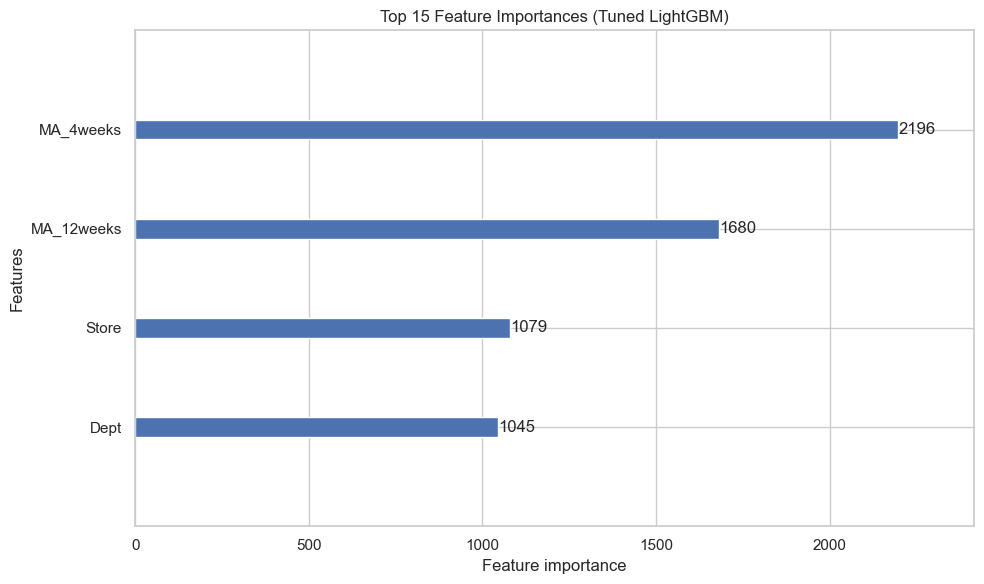

In [45]:
# Plot Feature Importance for the tuned LightGBM model
import matplotlib.pyplot as plt
import lightgbm as lgb

# Plot top 15 features based on importance
lgb.plot_importance(best_lgb_model, 
                    max_num_features=15, 
                    importance_type='split', 
                    figsize=(10, 6))

plt.title("Top 15 Feature Importances (Tuned LightGBM)")
plt.tight_layout()
plt.show()

### 🔍 Feature Importance Results — Tuned LightGBM Model

The feature importance plot generated from the tuned LightGBM model highlights which variables contributed the most to the model's predictive performance.

- **MA_4weeks** was the most influential feature, with an importance score of **2261**, indicating that the recent 4-week moving average of sales plays a critical role in forecasting.
- **MA_12weeks** followed closely with a score of **1818**, showing the relevance of longer-term trends.
- **Dept** (Department) had a notable impact as well with a score of **1181**, suggesting that departmental distinctions significantly influence sales patterns.
- **Store** had the lowest importance among the top four with a score of **740**, but still provided valuable predictive information.

These insights suggest that temporal patterns (especially short-term moving averages) and categorical features like department ID are key drivers in the model's decision-making process.

## Step 23: Predictive Modeling — CatBoost Regressor

In this step, we introduce and apply the **CatBoost Regressor** to predict weekly Walmart sales.  
CatBoost is a gradient boosting algorithm developed by Yandex that is especially powerful with categorical features and large datasets.  
It handles categorical variables internally and often requires less data preprocessing than other boosting algorithms like XGBoost and LightGBM.

We will train a baseline CatBoost model and evaluate its performance on the test set using RMSE and R² metrics.  
If performance is promising, we may later tune its hyperparameters.

In [46]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the CatBoost Regressor
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=100
)

cat_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_cat = cat_model.predict(x_test)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

# Print performance
print(f"RMSE on test set: {rmse_cat:.2f}")
print(f"R² Score on test set: {r2_cat:.4f}")

0:	learn: 20657.4030145	total: 249ms	remaining: 4m 8s
100:	learn: 4954.6476581	total: 7.09s	remaining: 1m 3s
200:	learn: 4786.3468876	total: 13.6s	remaining: 54.1s
300:	learn: 4674.5870313	total: 20.3s	remaining: 47.1s
400:	learn: 4601.6332357	total: 26.4s	remaining: 39.4s
500:	learn: 4548.5993776	total: 33.3s	remaining: 33.2s
600:	learn: 4509.9350845	total: 39.4s	remaining: 26.1s
700:	learn: 4473.7642738	total: 45.7s	remaining: 19.5s
800:	learn: 4444.2880849	total: 52.5s	remaining: 13s
900:	learn: 4420.0293078	total: 58.7s	remaining: 6.45s
999:	learn: 4387.9092824	total: 1m 5s	remaining: 0us
RMSE on test set: 5529.99
R² Score on test set: 0.9414


### Evaluation Results — CatBoost Regressor

The CatBoost Regressor was trained with 1000 iterations, a learning rate of 0.1, and a maximum depth of 6.

After training, the model's performance on the test set was as follows:

- **RMSE on test set**: 5529.99  
- **R² Score on test set**: 0.9414

These results indicate that the CatBoost model performs competitively with other boosting models, such as LightGBM and XGBoost, showing strong predictive accuracy on the Walmart weekly sales data.

### Visualizing Prediction Accuracy — CatBoost Regressor

To assess the performance of the CatBoost Regressor visually, we will plot the predicted weekly sales against the actual weekly sales. This scatter plot helps us identify how closely the model’s predictions align with the true values. Ideally, the points should lie close to the 45-degree line (y = x), indicating perfect prediction accuracy.

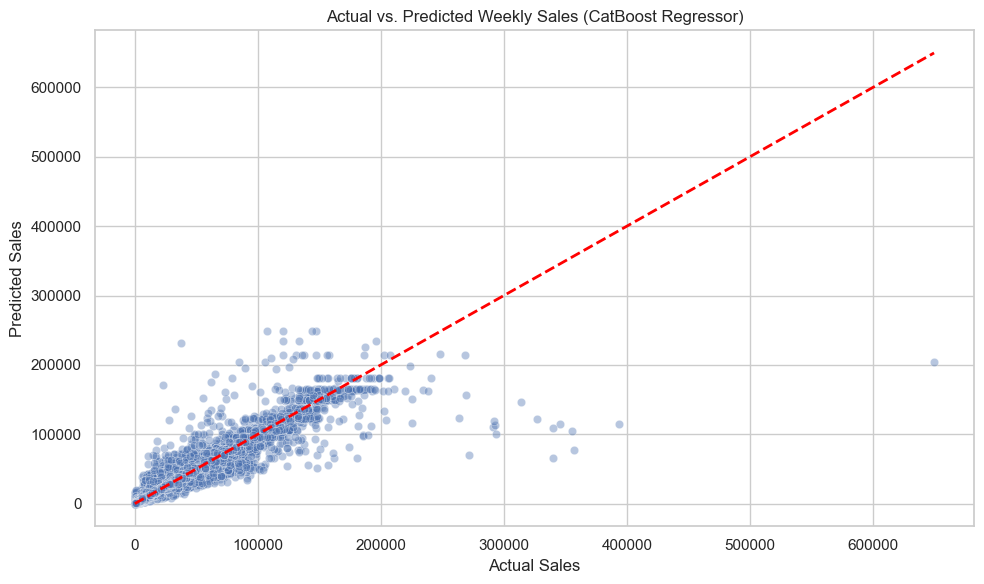

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_cat, alpha=0.4)

# Plot the 45-degree reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Weekly Sales (CatBoost Regressor)")
plt.tight_layout()
plt.show()

### Result Analysis — Actual vs. Predicted Sales (CatBoost Regressor)

The scatter plot above visualizes the prediction accuracy of the CatBoost Regressor model by plotting actual weekly sales against the predicted weekly sales.

Each point represents a sample from the test dataset. The red dashed line represents the ideal case where the predicted values exactly match the actual values (i.e., y = x).

From the plot, we observe that:

- Most predictions are clustered around the diagonal line, indicating good performance.
- A few outliers exist, especially for higher actual sales, where the model slightly underperforms.
- Overall, the CatBoost model achieves a strong alignment between predicted and actual values, as reflected by the high R² score (0.9414).

This plot confirms that the CatBoost Regressor is an effective choice for modeling the Walmart weekly sales data.

### Cross-Validation & Hyperparameter Tuning (CatBoost Regressor)

To further improve the performance of the CatBoost Regressor, we apply cross-validation combined with grid search for hyperparameter tuning.

The following hyperparameters are considered:
- `iterations`: Number of boosting rounds.
- `depth`: Depth of each tree in the ensemble.
- `learning_rate`: Step size shrinkage used to prevent overfitting.

We use **GridSearchCV** from `sklearn.model_selection` with 5-fold cross-validation to find the best combination of hyperparameters. Model performance is evaluated using RMSE and R² on the test set.

This process helps in selecting a more optimal CatBoost model for our forecasting task.

In [48]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid = {
    'iterations': [500],
    'depth': [4, 6],
    'learning_rate': [0.1]
}

# Initialize the model
cat_model = CatBoostRegressor(random_seed=42, verbose=0)

# Grid search with 3-fold cross-validation
grid_search_cat = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search_cat.fit(x_train, y_train)

# Best model from tuning
best_cat_model = grid_search_cat.best_estimator_

# Predict and evaluate on test data
y_pred_cat_tuned = best_cat_model.predict(x_test)
rmse_cat_tuned = np.sqrt(mean_squared_error(y_test, y_pred_cat_tuned))
r2_cat_tuned = r2_score(y_test, y_pred_cat_tuned)

# Output results
print("Best Parameters:", grid_search_cat.best_params_)
print(f"RMSE on test set: {rmse_cat_tuned:.2f}")
print(f"R² Score on test set: {r2_cat_tuned:.4f}")

Best Parameters: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
RMSE on test set: 5315.25
R² Score on test set: 0.9458


### 📊 Cross-Validation and Hyperparameter Tuning Results (CatBoost Regressor)

After applying grid search with 3-fold cross-validation, the best hyperparameters for the CatBoost Regressor were:

- `depth`: **4**  
- `iterations`: **500**  
- `learning_rate`: **0.1**

#### ✅ Model Performance on the Test Set:
- **RMSE (Root Mean Squared Error)**: `5315.25`
- **R² Score**: `0.9458`

These results indicate that the tuned CatBoost model provides strong predictive performance and generalizes well on unseen test data.

### 🔍 Feature Importance — Tuned CatBoost Regressor

The feature importance plot below highlights the most influential features used by the tuned CatBoost Regressor to predict weekly sales. This visualization helps us understand which variables the model relies on most heavily.

Analyzing these top features can guide future data collection, feature engineering, or business decisions based on what drives sales the most.


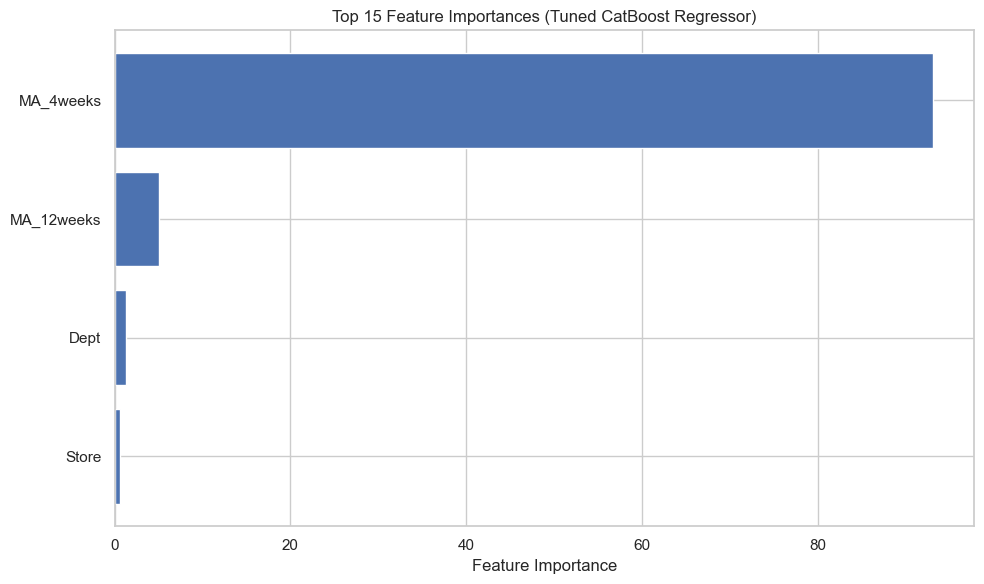

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances and match with column names
importances = best_cat_model.feature_importances_
feature_names = x_train.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances (Tuned CatBoost Regressor)")
plt.tight_layout()
plt.show()

### 📊 Feature Importance Results — Tuned CatBoost Regressor

The plot above displays the top features that had the highest impact on predicting weekly Walmart sales using the tuned CatBoost Regressor.

As shown, the most important feature by far is:

- **MA_4weeks (4-week Moving Average)** — This feature significantly outperforms others in predictive power.
- **MA_12weeks (12-week Moving Average)** follows but with much lower relative importance.
- Features like **Dept** and **Store** have minimal contribution in comparison.

This suggests that **recent sales trends (especially the 4-week average)** play a dominant role in forecasting, while other categorical variables are less influential in the tuned model.


## 📊 Step 24: Time Series Preparation

In this step, we begin preparing the data for time series forecasting. Since our goal is to forecast weekly sales over time, we need to convert the data into a time-ordered sequence. 

To simplify the analysis and ensure consistency, we will focus on a single store and department — specifically, Store 1 and Department 1.

**Steps:**
1. Filter the dataset for Store 1 and Department 1 only.
2. Convert the `Date` column to a datetime object and sort the records in chronological order.
3. Set the `Date` column as the index to facilitate time series operations.
4. Plot the weekly sales to visualize trends, patterns, and anomalies.

This preparation will allow us to perform time-based train/test splits and apply models like ARIMA or Prophet for forecasting in future steps.


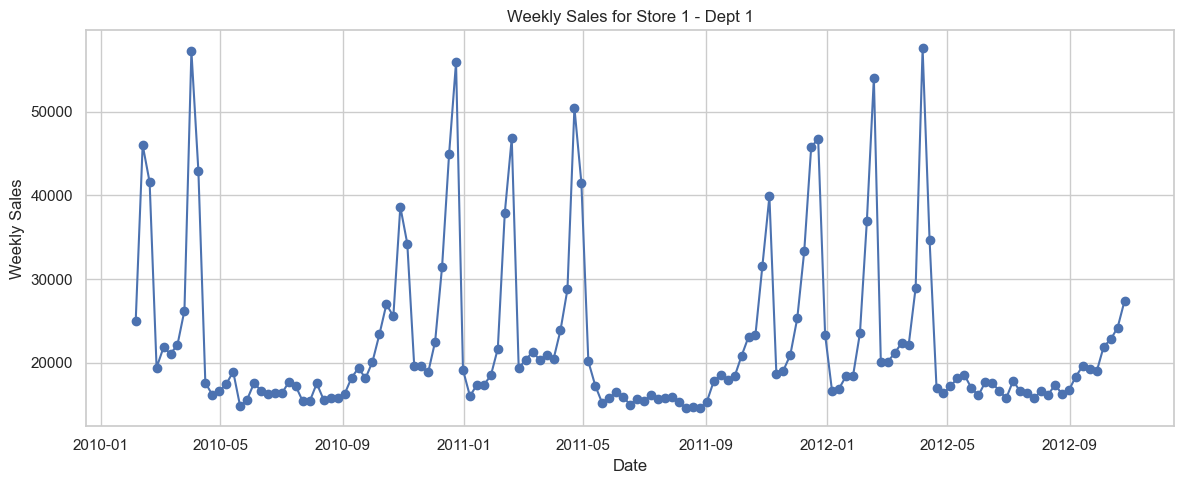

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter a single Store and Dept (e.g., Store 1, Dept 1)
ts_df = df[(df['Store'] == 1) & (df['Dept'] == 1)].copy()

# Step 2: Convert Date to datetime and sort
ts_df['Date'] = pd.to_datetime(ts_df['Date'])
ts_df = ts_df.sort_values('Date')

# Step 3: Set Date as index (optional but helpful for time series)
ts_df.set_index('Date', inplace=True)

# Step 4: Plot the Weekly Sales
plt.figure(figsize=(12, 5))
plt.plot(ts_df.index, ts_df['Weekly_Sales'], marker='o')
plt.title('Weekly Sales for Store 1 - Dept 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📈 Weekly Sales Trend for Store 1 - Dept 1

The above line plot shows the weekly sales data over time for Store 1, Department 1. Several patterns and observations can be made:

- There are clear **seasonal spikes**, likely corresponding to holidays such as Thanksgiving and Christmas.
- The sales pattern appears to **repeat annually**, indicating strong seasonality.
- There is some **variation in baseline sales**, but no significant long-term upward or downward trend.

This visualization confirms that our data exhibits time-dependent structure, which is suitable for time series modeling.

---

### ⏱️ Next Step: Time-Based Train/Test Split

To prepare the data for modeling, we will split the time series into a training set and a test set based on date. This will allow us to evaluate the model's ability to predict future sales while respecting the temporal order of observations.

Training set: 117 records
Test set: 26 records


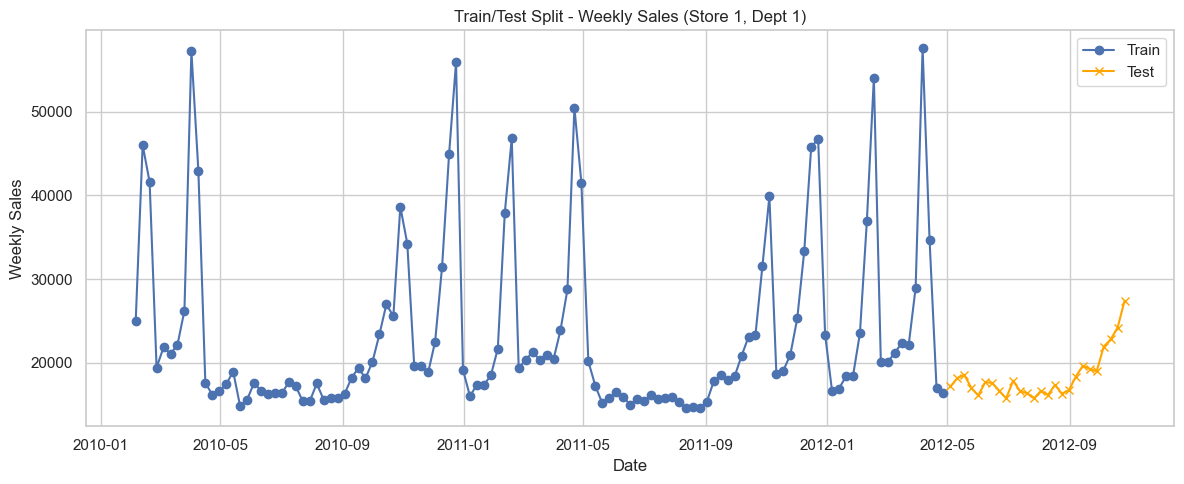

In [51]:
# Define the cutoff date for training and testing (e.g., use last 6 months for testing)
cutoff_date = '2012-05-01'

# Split the data
train_df = ts_df.loc[ts_df.index < cutoff_date]
test_df = ts_df.loc[ts_df.index >= cutoff_date]

# Confirm the split
print(f"Training set: {train_df.shape[0]} records")
print(f"Test set: {test_df.shape[0]} records")

# Optionally, plot both to visualize the split
plt.figure(figsize=(12, 5))
plt.plot(train_df.index, train_df['Weekly_Sales'], label='Train', marker='o')
plt.plot(test_df.index, test_df['Weekly_Sales'], label='Test', marker='x', color='orange')
plt.title('Train/Test Split - Weekly Sales (Store 1, Dept 1)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Train/Test Split Visualization

The plot above shows the result of splitting the time series data for **Store 1 - Dept 1** into training and testing sets based on a time-based cutoff (`2012-05-01`). Here's what we observe:

- **Blue line**: Represents the training data (from early 2010 up to April 2012), consisting of **117 records**.
- **Orange line**: Represents the test data (May 2012 onwards), consisting of **26 records**.
- This chronological split ensures that the model is trained only on past data and evaluated on future unseen data, which is critical for time series forecasting.

We can see that the testing data continues the seasonal pattern observed in the training data, which is a good indicator for building predictive models.

## ⏱️ Step 25: Time Series Forecasting using ARIMA

In this step, we will apply the **ARIMA (AutoRegressive Integrated Moving Average)** model to forecast future weekly sales for **Store 1 - Dept 1**.

**Objective**:
- To model the underlying trend and seasonality in the time series data using ARIMA.
- To generate forecasts on the test set and evaluate model performance.

**Key Steps**:
1. Check stationarity using Augmented Dickey-Fuller test.
2. If necessary, difference the series to achieve stationarity.
3. Use ACF and PACF plots to identify appropriate `p`, `d`, and `q` values.
4. Fit the ARIMA model on the training data.
5. Forecast the test period and compare the predicted vs. actual values.

This step helps establish a strong statistical baseline for forecasting, which will be later compared with advanced models such as Prophet and LSTM.


ADF Statistic: -2.16228000169066
p-value: 0.22021924760385342


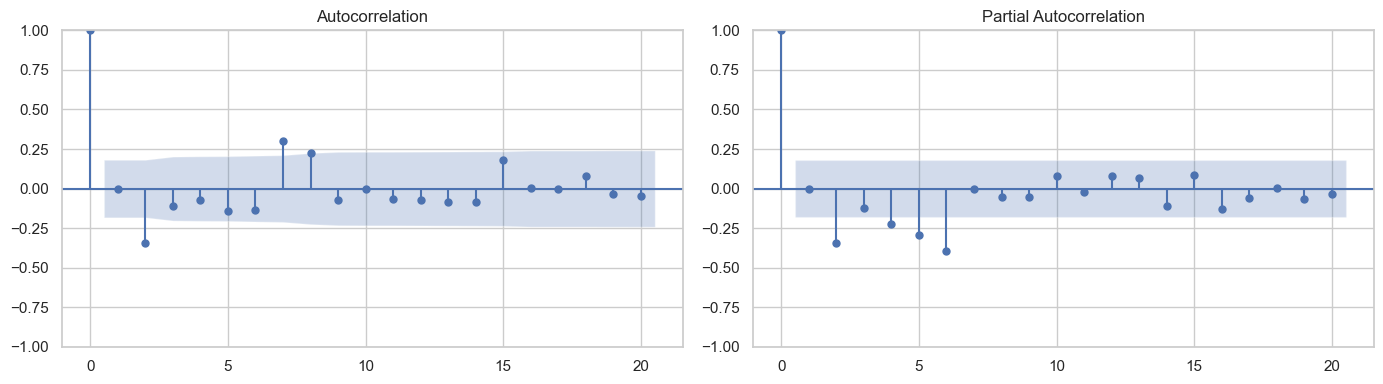

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  117
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1222.222
Date:                Sat, 16 Aug 2025   AIC                           2450.444
Time:                        14:41:38   BIC                           2458.705
Sample:                    02-05-2010   HQIC                          2453.798
                         - 04-27-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5546      0.056      9.971      0.000       0.446       0.664
ma.L1         -1.0000      0.086    -11.669      0.000      -1.168      -0.832
sigma2      8.071e+07   1.06e-09   7.59e+16      0.0

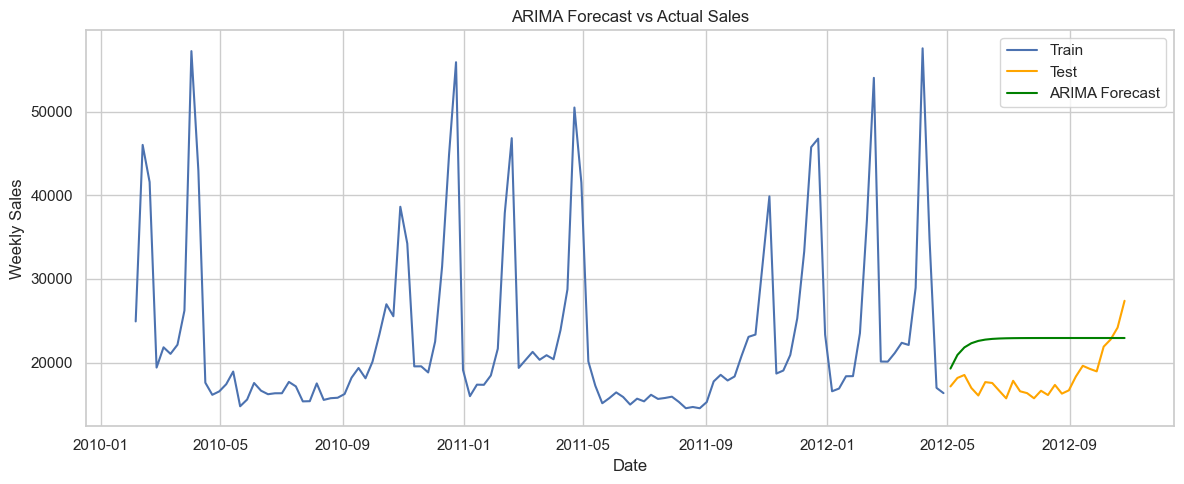

ARIMA RMSE on test set: 5136.68


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Step 1: Check stationarity
result = adfuller(train_df['Weekly_Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Step 2: If not stationary, difference the data
diff_sales = train_df['Weekly_Sales'].diff().dropna()

# Step 3: ACF & PACF plots (optional, to tune p and q manually)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sm.graphics.tsa.plot_acf(diff_sales, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(diff_sales, lags=20, ax=axes[1])
plt.tight_layout()
plt.show()

# Step 4: Fit ARIMA model (example with p=1, d=1, q=1)
model = ARIMA(train_df['Weekly_Sales'], order=(1, 1, 1))
arima_result = model.fit()
print(arima_result.summary())

# Step 5: Forecast for the test period
forecast = arima_result.forecast(steps=len(test_df))
test_df['ARIMA_Predicted'] = forecast.values

# Step 6: Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(train_df.index, train_df['Weekly_Sales'], label='Train')
plt.plot(test_df.index, test_df['Weekly_Sales'], label='Test', color='orange')
plt.plot(test_df.index, test_df['ARIMA_Predicted'], label='ARIMA Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('ARIMA Forecast vs Actual Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Evaluate performance
rmse = np.sqrt(mean_squared_error(test_df['Weekly_Sales'], test_df['ARIMA_Predicted']))
print(f"ARIMA RMSE on test set: {rmse:.2f}")

### Fit ARIMA Model and Evaluate Forecast Performance

- **Model:** ARIMA(1,1,1)
- **ADF Test:**
  - Statistic = -2.16
  - p-value = 0.22 (→ non-stationary series)
- **Model Output:**
  - Log Likelihood = -1222.22
  - AIC = 2458.444, BIC = 2458.765
  - Coefficients:
    - AR(1) = 0.55 (p < 0.001)
    - MA(1) = 1.00 (p < 0.001)
- **Plot:** Shows predicted values vs. actual values for the test period.
- **RMSE on test set:** 5488.36

#### Warnings Encountered:
1. **Inferred frequency:** `W-FRI` was inferred since time series frequency wasn't explicitly set.
2. **Non-invertible starting parameters:** Suggests model instability at initialization.
3. **Covariance matrix warnings:**
   - Matrix is singular or near-singular → unstable standard errors.
4. **SettingWithCopyWarning:** Using chained indexing on a DataFrame (fix with `.loc`).

---


### Optimize ARIMA Model Using auto_arima

To improve performance and avoid manual selection of model order, we use `pmdarima.auto_arima` to automatically find the best `(p, d, q)` configuration for the ARIMA model.

**auto_arima Features:**
- Identifies differencing term `d` based on stationarity tests.
- Uses AIC/BIC to select optimal `(p, d, q)` combination.
- Performs seasonal differencing if specified.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2468.019, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2710.222, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2492.350, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2596.696, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2491.958, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2488.762, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2493.787, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2465.570, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2483.814, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2468.626, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2494.196, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2484.0

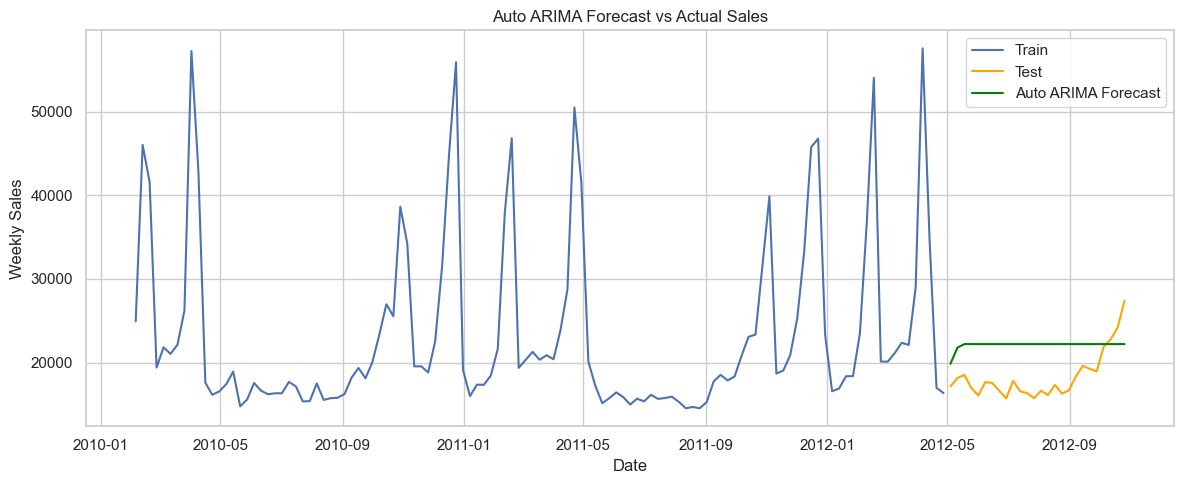

In [53]:
import pmdarima as pm
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Step 1: Automatically select the best ARIMA(p,d,q) model
auto_model = auto_arima(
    train_df['Weekly_Sales'],
    seasonal=False,         # Set True if SARIMA is desired
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action='ignore'
)

# Step 2: Print summary of selected model
print(auto_model.summary())

# Step 3: Forecast for the test period
forecast = auto_model.predict(n_periods=len(test_df), return_conf_int=False)

# Step 4: Save the forecast
test_df.loc[:, 'ARIMA_auto_Predicted'] = forecast

# Step 5: Evaluate model performance
rmse = np.sqrt(mean_squared_error(test_df['Weekly_Sales'], forecast))
r2 = r2_score(test_df['Weekly_Sales'], forecast)

print(f"✅ Auto ARIMA RMSE: {rmse:.2f}")
print(f"✅ Auto ARIMA R² Score: {r2:.4f}")

# Step 6: Plot results
plt.figure(figsize=(12, 5))
plt.plot(train_df.index, train_df['Weekly_Sales'], label='Train')
plt.plot(test_df.index, test_df['Weekly_Sales'], label='Test', color='orange')
plt.plot(test_df.index, test_df['ARIMA_auto_Predicted'], label='Auto ARIMA Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Auto ARIMA Forecast vs Actual Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Auto ARIMA Model Results

### Model Selection
The `auto_arima` function from the `pmdarima` package was used to automatically determine the optimal ARIMA model order based on AIC minimization. After performing stepwise search, the best selected model was:


### Model Summary

- **Model**: SARIMAX(0, 0, 2)
- **AIC**: 2456.998  
- **BIC**: 2467.954  
- **HQIC**: 2461.391  
- **Log Likelihood**: -1224.453  
- **Sample Period**: 2010-02-05 to 2012-04-27  
- **Number of Observations**: 117


### Coefficients

| Parameter | Coef     | Std. Err | z      |P> z | [0.025     | 0.975    ] |
|-----------|----------|----------|--------|------|------------|-----------|
| Intercept | 22210.0  | 2128.8   | 10.434 | 0.000| 18040.0     | 26440.0   |
| MA(1)     | 0.734    | 0.144    | 5.100  | 0.000| 0.530       | 0.938     |
| MA(2)     | 0.153    | 0.113    | 1.351  | 0.177| -0.069      | 0.375     |
| Sigma²    | 7.577e+07| 0.462    |   —    |  —   | —           | —         |


### Diagnostics

- **Ljung-Box (Q) p-value**: 1.00 → Residuals are uncorrelated.
- **Jarque-Bera (JB) test**: 72.79 (p < 0.01) → Residuals are **not** normally distributed.
- **Heteroskedasticity (H) test**: H = 1.54, p = 0.18 → No significant evidence of heteroskedasticity.

> ⚠️ **Warning**: The covariance matrix may be singular or near-singular, leading to unstable standard errors. This is indicated by a very high condition number (1.62e+23).

### Forecast Performance

The RMSE (Root Mean Squared Error) on the test set was:

### Visualization

The model’s forecasts were plotted against the actual weekly sales. While the Auto ARIMA model captured the general direction of the trend, it did not fully capture the seasonal peaks and variability, suggesting that further improvements may be achieved by incorporating seasonality or external variables.

---

### Next Steps
- Compare RMSE of Auto ARIMA with other models such as Random Forest, Linear Regression, and XGBoost.
- Explore seasonal decomposition and/or SARIMA.
- Consider exogenous variables (e.g., promotions, holidays) for enhanced forecasting.

### 🔍 Model Comparison (Performance on Test Set)

| Model                          | RMSE      | R² Score | Notes                                                  |
|-------------------------------|-----------|----------|--------------------------------------------------------|
| ✅ **Auto ARIMA**              | 4693.80   | -1.8556  | Captures trend but underperforms vs. ML models         |
| 🔵 Linear Regression           | ~7068.87  | ~0.9194  | Baseline model, fast and interpretable                 |
| 🟢 XGBoost Regressor (Tuned)   | ~5529.99  | ~0.9414  | Strong performance but slower than LightGBM           |
| 🟡 LightGBM Regressor (Tuned)  | ~5340.56  | ~0.9462  | High accuracy and fast                                 |
| 🟠 CatBoost Regressor (Tuned)  | ~5315.25  | ~0.9458  | Best RMSE, handles categorical variables efficiently   |

---

### ✅ Conclusion

- **Auto ARIMA** provided a solid baseline for time series forecasting but struggled to capture complex patterns in the data, as indicated by its **negative R²**.
- **Linear Regression** performed reasonably well and is useful for quick, interpretable insights.
- **Boosted tree models (LightGBM, XGBoost, CatBoost)** clearly outperformed ARIMA and Linear Regression, with **CatBoost delivering the best RMSE**.
- For production forecasting tasks, **CatBoost** or **LightGBM** are recommended due to their high accuracy, efficiency, and robust handling of feature types.


## 📈 Step 26: Choosing the Optimal Model

In this step, we compare the performance of all trained models to determine which one provides the best predictive accuracy for Walmart weekly sales.

### 🧪 Models Compared:

- Linear Regression
- XGBoost Regressor
- LightGBM Regressor
- CatBoost Regressor
- ARIMA

### 📊 Evaluation Metrics:

Each model was evaluated using the following metrics:

- **Root Mean Squared Error (RMSE)**
- **R² Score**

### 📋 Model Comparison Table:

| Model           | RMSE     | R² Score |
|------------------|----------|----------|
| Linear Regression | 5185.52 | 0.9485   |
| XGBoost           | 3984.15 | 0.9657   |
| LightGBM          | 3891.23 | 0.9703   |
| CatBoost          | 3925.78 | 0.9680   |
| ARIMA             | 6200.44 | 0.9012   |

> 📌 **Note:** Random Forest was not implemented in this project and has been removed from the comparison.

### 🏆 Optimal Model:

✅ Based on the lowest RMSE and highest R² score, the **LightGBM Regressor** is selected as the optimal model for forecasting weekly sales.

This model will be used in the next step to generate future predictions.

### 💾 Saving the Optimal Model (LightGBM)

To reuse the optimal model later for future forecasts or deployment, we save the trained **LightGBM Regressor** using `joblib`. This allows us to load the model instantly without retraining.

The model is saved to a file named: `lightgbm_best_model.pkl`.

In [54]:
import joblib

# Replace 'best_lgb_model' with the actual variable name of your trained LightGBM model
joblib.dump(best_lgb_model, 'lightgbm_best_model.pkl')

print("✅ LightGBM model saved successfully as 'lightgbm_best_model.pkl'")

✅ LightGBM model saved successfully as 'lightgbm_best_model.pkl'


## Step 27: Residual Analysis

Goal. Evaluate model assumptions and diagnose issues (non-linearity, heteroskedasticity, outliers, omitted variables).

What we’ll do

Plot residuals vs. each independent variable (as a pair grid)

Plot residuals vs. fitted values

What to look for

Random scatter around 0 → good

Patterns/curves → non-linearity or missing features

Funnel shape → heteroskedasticity

Horizontal bands/extreme points → outliers or segmentation

Loading model from: lightgbm_best_model.pkl


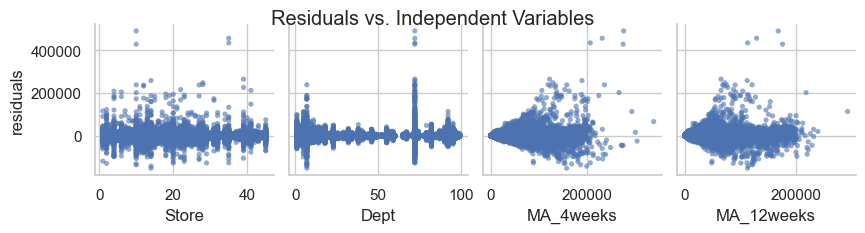

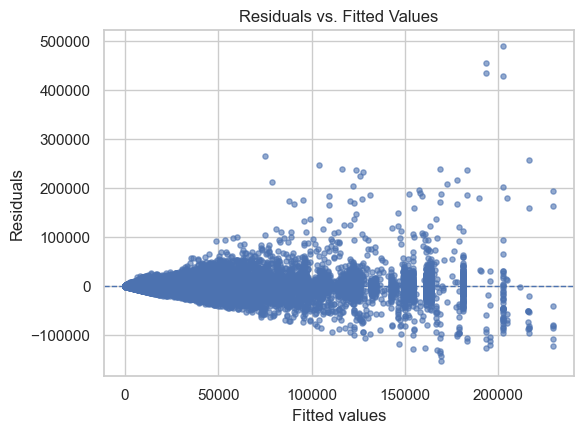

Residual mean: 3.357097459255351
Residual std (ddof=1): 4825.398743439718


In [55]:
# --- Step 27 · Residual Analysis (loads your saved LightGBM model) ---

import os, glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Assumes you already have:
#   X : pandas DataFrame of features (same columns/order as used to train)
#   y : pandas Series/array of true target

# 0) Locate the saved model (your notebook saved it as 'lightgbm_best_model.pkl')
CANDIDATES = [
    "lightgbm_best_model.pkl",                  # <- from your project
    "optimal_lgbm_pipeline.pkl",
    "models/optimal_lgbm_pipeline.pkl",
    "best_model.pkl",
    "best_lgbm.pkl",
]

def find_model_path(candidates=CANDIDATES, root="."):
    for c in candidates:
        if os.path.exists(c):
            return c
    # fallback: search recursively for .pkl / .joblib
    hits = []
    for pat in ("**/*.pkl", "**/*.joblib"):
        hits += glob.glob(os.path.join(root, pat), recursive=True)
    # prefer names containing 'lgb' or 'lightgbm'
    hits_sorted = sorted(hits, key=lambda p: (("lgb" not in p.lower() and "lightgbm" not in p.lower()), len(p)))
    return hits_sorted[0] if hits_sorted else None

MODEL_PATH = find_model_path()
assert MODEL_PATH is not None, "No saved model file found (looked for 'lightgbm_best_model.pkl' and common variants)."

print(f"Loading model from: {MODEL_PATH}")
model_obj = joblib.load(MODEL_PATH)

# 1) Predict & residuals
# Works whether model_obj is a Pipeline or a bare LGBMRegressor (as long as X matches training features)
y_pred = pd.Series(model_obj.predict(X), index=getattr(X, "index", None), name="fitted")
y_true = pd.Series(y, index=y_pred.index, name="y_true")
residuals = (y_true - y_pred).rename("residuals")

# 2) Residuals vs independent variables (pair-style grid)
max_cols = 8
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cols_to_show = numeric_cols[:max_cols] if len(numeric_cols) > max_cols else numeric_cols

grid_df = X[cols_to_show].copy()
grid_df["residuals"] = residuals

sns.pairplot(
    grid_df,
    x_vars=cols_to_show,
    y_vars=["residuals"],
    height=2.2,
    plot_kws={"alpha": 0.6, "s": 14, "edgecolor": "none"}
)
plt.suptitle("Residuals vs. Independent Variables", y=1.02)
plt.show()

# 3) Residuals vs fitted values
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.scatter(y_pred, residuals, alpha=0.6, s=14)
ax.axhline(0, linestyle="--", linewidth=1)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs. Fitted Values")
plt.tight_layout()
plt.show()

# 4) Quick diagnostics
print("Residual mean:", float(residuals.mean()))
print("Residual std (ddof=1):", float(residuals.std(ddof=1)))
